# <a name="0">kaggle Credit Card Dataset Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#1">Data investigation</a>
3. <a href="#2">Data preprocessing </a>
4. <a href="#3">Clustring </a>
5. <a href="#4">PCA Clustring</a>
6. <a href="#5">kernel PCA Clustring</a>
7. <a href="#6">Hirarical Clustring</a>
8. <a href="#7">Outliers Detection</a>
9. <a href="#8">Conclusion</a>




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessings
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_kernels
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from gap_statistic import OptimalK
import pickle
import scipy.cluster.hierarchy as shc
warnings.filterwarnings("ignore")

In [2]:
# !pip install gap-stat

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [3]:
#read the data

data_path = r"C:\Users\Omar\Downloads\Mach2\Projct\CCGENERAL.csv"  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [7]:
# feel free to investigate what you want
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Customer ID should not be a part of the data to be analyzied<br>
2- Deal with NAN values <br>
3- Deal with skewed features          <br>

In [8]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

The customer ID does not describe the customers, as it is just a value to identify the customers but it is not a meaningful property of the customer data. Because of that we need to drop this feature to not interfere with our analysis.

In [9]:
#solution
df_copy.drop("CUST_ID", axis=1, inplace=True)

In [10]:
#test 
df_copy.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

After excluding the customer ID feature, I delved into examining the correlation among the remaining numerical features. The correlation map brought to light a strong link between the "one-time purchases" and "purchases" features. Intriguingly, a closer look at the impact of removing one of these highly correlated features revealed a reduction in the number of clusters. This reduction stemmed from the removal of the interactive influence between the eliminated feature and other traits.

Consequently, I opted to proceed with analyzing the data using the complete set of characteristics. However, I'm open to the possibility of conducting another analysis with certain features excluded, should the advice from a domain expert indicate that some of the features influencing clustering are not significant

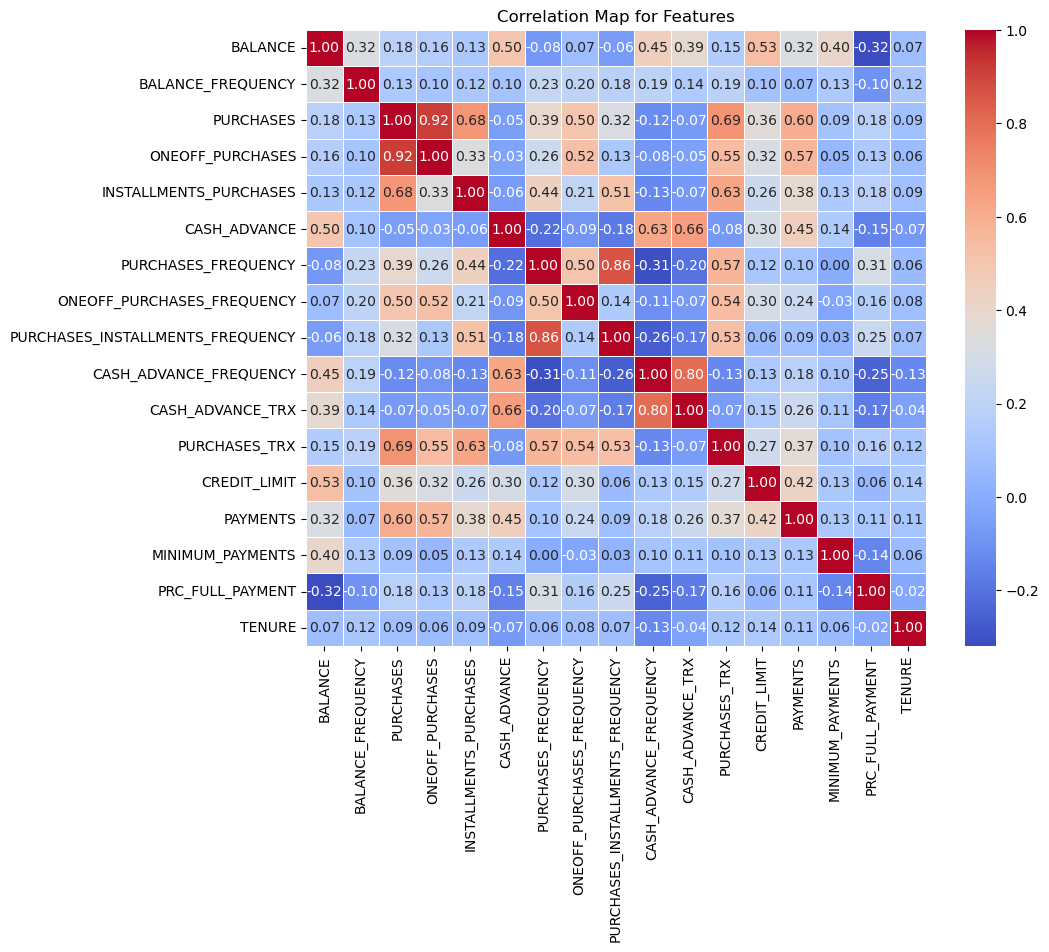

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map for Features')
plt.show()

**Second issue**

The second challenge revolved around dealing with null values in the minimum payments and credit limit features. While exploring the option of replacing these null values with numerical values, it became apparent that this approach was not feasible. Consequently, the decision was made to address this issue by removing the records that contained null values in these specific features.

In [12]:
#solution 
df_copy = df_copy[df_copy["MINIMUM_PAYMENTS"].notnull()]
# df_copy[["PURCHASES","PAYMENTS","MINIMUM_PAYMENTS"]].head(30)


In [13]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8637 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8637 non-null   float64
 1   BALANCE_FREQUENCY                 8637 non-null   float64
 2   PURCHASES                         8637 non-null   float64
 3   ONEOFF_PURCHASES                  8637 non-null   float64
 4   INSTALLMENTS_PURCHASES            8637 non-null   float64
 5   CASH_ADVANCE                      8637 non-null   float64
 6   PURCHASES_FREQUENCY               8637 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8637 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8637 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8637 non-null   float64
 10  CASH_ADVANCE_TRX                  8637 non-null   int64  
 11  PURCHASES_TRX                     8637 non-null   int64  
 12  CREDIT_LIMI

In [14]:
#solution
df_copy = df_copy[df_copy["CREDIT_LIMIT"].notnull()]

In [15]:
# test
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

**Third Issue**

The third challenge arose from the rightward skewness in some of the features. To tackle this issue, a solution was found in applying a log transform to these specific features.

In [16]:
# issue
df_copy.skew()

BALANCE                              2.374254
BALANCE_FREQUENCY                   -2.084161
PURCHASES                            8.055789
ONEOFF_PURCHASES                     9.935776
INSTALLMENTS_PURCHASES               7.216133
CASH_ADVANCE                         5.139629
PURCHASES_FREQUENCY                  0.033041
ONEOFF_PURCHASES_FREQUENCY           1.504234
PURCHASES_INSTALLMENTS_FREQUENCY     0.487753
CASH_ADVANCE_FREQUENCY               1.795915
CASH_ADVANCE_TRX                     5.673327
PURCHASES_TRX                        4.578418
CREDIT_LIMIT                         1.507019
PAYMENTS                             5.873049
MINIMUM_PAYMENTS                    13.622193
PRC_FULL_PAYMENT                     1.886027
TENURE                              -3.011141
dtype: float64

In [17]:
#Solution
df_normalized =df_copy.copy()
#df_normalized.drop("ONEOFF_PURCHASES", axis=1, inplace=True)
transformer = FunctionTransformer(np.log1p, validate=True)
df_normalized['ONEOFF_PURCHASES'] =transformer.transform(df_normalized['ONEOFF_PURCHASES'].values.reshape((-1,1)))
df_normalized['BALANCE'] = transformer.transform(df_normalized['BALANCE'].values.reshape((-1,1)))
df_normalized['PURCHASES'] = transformer.transform(df_normalized['PURCHASES'].values.reshape((-1,1)))
df_normalized['INSTALLMENTS_PURCHASES'] = transformer.transform(df_normalized['INSTALLMENTS_PURCHASES'].values.reshape((-1,1)))
df_normalized['CASH_ADVANCE'] = transformer.transform(df_normalized['CASH_ADVANCE'].values.reshape((-1,1)))
df_normalized['CASH_ADVANCE_FREQUENCY'] = transformer.transform(df_normalized['CASH_ADVANCE_FREQUENCY'].values.reshape((-1,1)))
df_normalized['CASH_ADVANCE_TRX'] = transformer.transform(df_normalized['CASH_ADVANCE_TRX'].values.reshape((-1,1)))
df_normalized['PURCHASES_TRX'] = transformer.transform(df_normalized['PURCHASES_TRX'].values.reshape((-1,1)))
df_normalized['CREDIT_LIMIT'] = transformer.transform(df_normalized['CREDIT_LIMIT'].values.reshape((-1,1)))
df_normalized['PAYMENTS'] = transformer.transform(df_normalized['PAYMENTS'].values.reshape((-1,1)))                      
df_normalized['MINIMUM_PAYMENTS'] = transformer.transform(df_normalized['MINIMUM_PAYMENTS'].values.reshape((-1,1)))    
df_normalized['PRC_FULL_PAYMENT'] = transformer.transform(df_normalized['PRC_FULL_PAYMENT'].values.reshape((-1,1)))  

In [18]:
#test
pd.DataFrame(df_normalized).skew()

BALANCE                            -0.776004
BALANCE_FREQUENCY                  -2.084161
PURCHASES                          -0.777688
ONEOFF_PURCHASES                    0.168420
INSTALLMENTS_PURCHASES             -0.042157
CASH_ADVANCE                        0.248169
PURCHASES_FREQUENCY                 0.033041
ONEOFF_PURCHASES_FREQUENCY          1.504234
PURCHASES_INSTALLMENTS_FREQUENCY    0.487753
CASH_ADVANCE_FREQUENCY              1.425892
CASH_ADVANCE_TRX                    0.920619
PURCHASES_TRX                       0.009795
CREDIT_LIMIT                       -0.106402
PAYMENTS                           -0.050354
MINIMUM_PAYMENTS                    0.251524
PRC_FULL_PAYMENT                    1.690590
TENURE                             -3.011141
dtype: float64

## 4. <a name="4">Clustring</a>
(<a href="#4">Go to top</a>)

In this section, we utilized a range of clustering algorithms, including Kernel K-means, K-means, DBSCAN, and Gaussian Mixture Model, to categorize the data. Additionally, we applied the t-SNE algorithm to visualize the clusters generated by each method. Subsequently, we delved into the identified clusters to discern their unique characteristics. To further our analysis, we employed Principal Component Analysis (PCA) to investigate its influence on the clustering of the data.

In [20]:


# X is your data
# range_of_clusters is the range of cluster numbers you want to try
def ClusturVSsilhouetteScores(X,range_of_clusters):
    silhouette_scores = []

    for n_clusters in range_of_clusters:
        # Fit the k-means model
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X)

        # Compute the silhouette score
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    # Find the optimal number of clusters
    optimal_k = range_of_clusters[np.argmax(silhouette_scores)]

    print(f"Optimal number of clusters: {optimal_k}")
    plt.plot(range_of_clusters, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Different Numbers of Clusters')
    plt.show()


In [19]:
def elbowMethodK(df_normalized):    
    inertia = []


    for i in range(1, 30):
        kmeans = KMeans(n_clusters=i, n_init="auto").fit(df_normalized)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, 30), inertia, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

In [20]:
def kmeansPlt(df_normalized,n_clusters):
    optKmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(df_normalized)
    silhouette_max = silhouette_score(df_normalized, optKmeans.labels_)
    # why random state gives me different solutions 
    for i in range(50):
        kmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(df_normalized)
        silhouette_avg = silhouette_score(df_normalized, kmeans.labels_)
        # print(silhouette_avg)
        if silhouette_avg >silhouette_max:
            optKmeans = kmeans
            silhouette_max = silhouette_avg


    # pca = PCA(n_components=2)
    # df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1', 'PC2'])


    # df_pca['cluster'] = kmeans.labels_
    

    # plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='plasma', marker='o', edgecolors='w')
    # plt.title('KMeans Clustering')
    # plt.xlabel('Principal Component 1')
    # plt.ylabel('Principal Component 2')


    # plt.show()
    return optKmeans

In [21]:




def kernelKmeans(df_normalized,n_clusters,gamma=0.01):
    # Compute the RBF kernel matrix
    kernel_matrix = pairwise_kernels(df_normalized, metric='rbf', gamma=gamma)

    optKmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(kernel_matrix)
    silhouette_max = silhouette_score(df_normalized, optKmeans.labels_)
    
    for i in range(50):
    # Fit KMeans model with the kernel matrix
        kmeans_kernel = KMeans(n_clusters=n_clusters, n_init="auto").fit(kernel_matrix)
        silhouette_avg = silhouette_score(df_normalized, kmeans_kernel.labels_)
        # print(silhouette_avg)
        if silhouette_avg >silhouette_max:
            optKmeans = kmeans_kernel
            silhouette_max = silhouette_avg

    # Reduce the dimensionality for visualization (using PCA)
    # pca = PCA(n_components=2)
    # df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1', 'PC2'])

    # # Add cluster labels to the DataFrame
    # df_pca['cluster'] = kmeans_kernel.labels_

    # Plot the clusters
    # plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', marker='o', edgecolors='w')
    # plt.title('Kernel KMeans Clustering')
    # plt.xlabel('Principal Component 1')
    # plt.ylabel('Principal Component 2')
    # plt.show()
    return optKmeans

In [22]:


def k_distancePlot(df_normalized,n_neighbors=10):
    # Assuming 'df_normalized' is your normalized DataFrame

    # Use Nearest Neighbors to calculate distances
    neigh = NearestNeighbors(n_neighbors=n_neighbors)  # Adjust the number of neighbors as needed
    neigh.fit(df_normalized)
    distances, indices = neigh.kneighbors(df_normalized)

    # Sort the distances
    distances = np.sort(distances[:, n_neighbors-1])  # Choose the appropriate index for the k-th nearest neighbor

    # Plot the k-distance graph
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.xlabel('Data Points (sorted)')
    plt.ylabel('Distance to 4th Nearest Neighbor')  # Adjust the number accordingly
    plt.show()

    # Use KneeLocator to find the "knee" or optimal value for eps
    kneedle = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
    optimal_eps = kneedle.elbow_y

    print(f"Optimal eps value: {optimal_eps}")

In [23]:



def DBSCANPlt(df_normalized,eps=2.820054546540241,min_samples=10):
    # Apply DBSCAN clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(df_normalized)

    # Reduce the dimensionality for visualization (using PCA)
    pca = PCA(n_components=2)
    df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1', 'PC2'])

    # Add cluster labels to the DataFrame
    df_pca['cluster'] = clustering.labels_

    # Plot the clusters
    # plt.figure(figsize=(10, 7))

    # # Plot points with noise in black
    # plt.scatter(df_pca['PC1'][df_pca['cluster'] == -1], df_pca['PC2'][df_pca['cluster'] == -1],
    #             color='black', marker='x', label='Noise')

    # # Plot points with clusters in different colors
    # for cluster_label in set(clustering.labels_):
    #     if cluster_label != -1:
    #         print(cluster_label)
    #         plt.scatter(df_pca['PC1'][df_pca['cluster'] == cluster_label],
    #                     df_pca['PC2'][df_pca['cluster'] == cluster_label],
    #                     label=f'Cluster {cluster_label}')

    # plt.title('DBSCAN Clustering')
    # plt.xlabel('Principal Component 1')
    # plt.ylabel('Principal Component 2')
    # plt.legend()
    # plt.show()
    return clustering

In [31]:

tsne = TSNE(init='pca',n_components=2, perplexity=35,learning_rate=0.1,n_iter=5000)
df_tsne = pd.DataFrame(tsne.fit_transform(df_normalized), columns=['Dimension 1', 'Dimension 2'])
# Assuming 'df_normalized' is your normalized DataFrame
def tsnePlt(df_tsne, labels):
    

    # Visualize the result
    plt.figure(figsize=(10, 7))

    # Assuming you have labels or cluster assignments in 'clustering.labels_'
    # Replace 'clustering.labels_' with the actual cluster assignments if available
    plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=labels, cmap='viridis', marker='o', edgecolors='w')

    plt.title('t-SNE Visualization')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(label='Cluster')
    plt.show()


In [26]:
def GaussianMixturePlt(df_normalized,n_components):
    optKGaussian = GaussianMixture(n_components=n_components).fit(df_normalized)
    silhouette_max = silhouette_score(df_normalized, optKGaussian.predict(df_normalized))
    
    for i in range(50):
    # Fit KMeans model with the kernel matrix
        gm = GaussianMixture(n_components=n_components).fit(df_normalized)
        silhouette_avg = silhouette_score(df_normalized, gm.predict(df_normalized))
        # print(silhouette_avg)
        if silhouette_avg >silhouette_max:
            optKGaussian = gm
            silhouette_max=silhouette_avg
    
    
    # Reduce dimensionality using PCA to 2 components
    # pca = PCA(n_components=2)
    # df_pca = pca.fit_transform(df_normalized)

    # # Predict cluster labels
    # labels = optKGaussian.predict(df_normalized)

    # Create a scatter plot
    # plt.figure(figsize=(10, 6))
    # sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='viridis', s=50)
    # plt.title('GMM Clustering (PCA)')
    # plt.xlabel('Principal Component 1')
    # plt.ylabel('Principal Component 2')
    # plt.show()
    return optKGaussian

The provided code utilizes graph statistics to hint the most suitable number of clusters.

In [27]:

# X is your data

# Create a range of cluster numbers you want to try
cluster_range = range(1, 11)

# Generate reference data
reference_data = np.random.rand(*df_normalized.shape)

# Specify the number of Monte Carlo simulations
n_simulations = 1000

# Use the OptimalK class from the gap_statistic package
optimal_k = OptimalK(parallel_backend='joblib',n_jobs=1)

# Compute optimal k
optimal_k(df_normalized, cluster_array=cluster_range, n_refs=n_simulations)  # The reference_data argument is not needed here

# Get the optimal number of clusters
n_clusters = optimal_k.gap_df["gap_value"].idxmax() + 1

print(f"Optimal number of clusters: {n_clusters}")


Optimal number of clusters: 10


The following code employs the silhouette average method to identify the optimal number of clusters.

Optimal number of clusters: 7


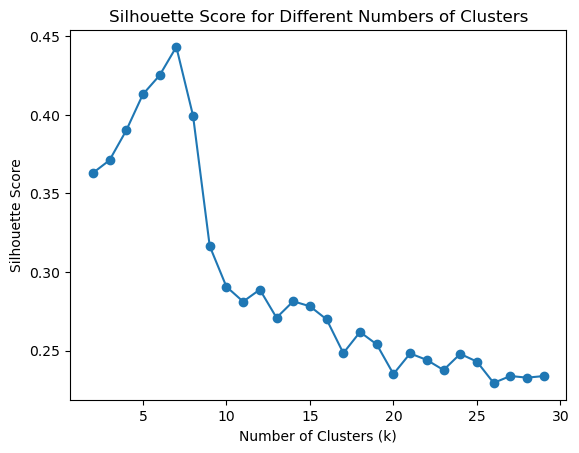

In [ ]:
ClusturVSsilhouetteScores(df_normalized,range(2,30))

The elbow method, corroborated by the silhouette average, indicates that the optimal number of clusters is arround 7.

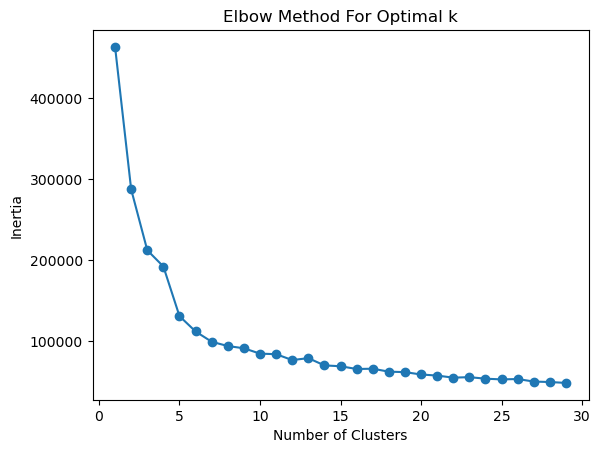

In [ ]:
elbowMethodK(df_normalized)

In [ ]:
KMeansClassifier=kmeansPlt(df_normalized,n_clusters=7)

In [ ]:
silhouette_score(df_normalized,KMeansClassifier.labels_)

0.44322153145508086

In [ ]:
kernelKmeansClassifier=kernelKmeans(df_normalized,7,gamma=0.01)

In [ ]:
silhouette_score(df_normalized,kernelKmeansClassifier.labels_)

0.43897887249759404

In [ ]:
GaussianMixtureModel=GaussianMixturePlt(df_normalized,n_components=7)

In [ ]:
silhouette_score(df_normalized,GaussianMixtureModel.predict(df_normalized))

0.4335220367911412

The t-SNE visualizations below demonstrate that the data can be effectively clustered into 7 groups. Additionally, the visualizations indicate that the Gaussian Mixture Model performed the best in clustering the data.

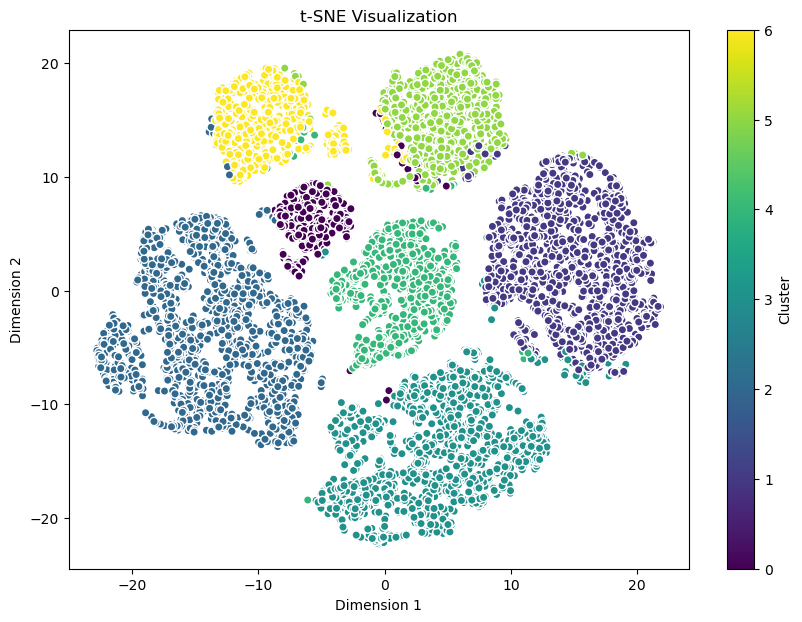

In [ ]:
tsnePlt(df_tsne,kernelKmeansClassifier.labels_) #Kernel  KMeans visualization with tsne

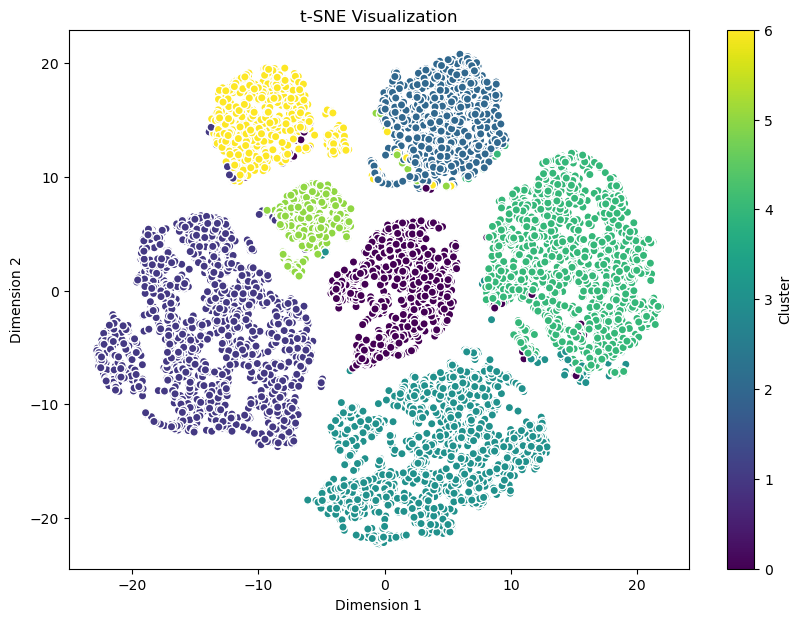

In [ ]:
tsnePlt(df_tsne,KMeansClassifier.labels_) #KMeans visualization with tsne

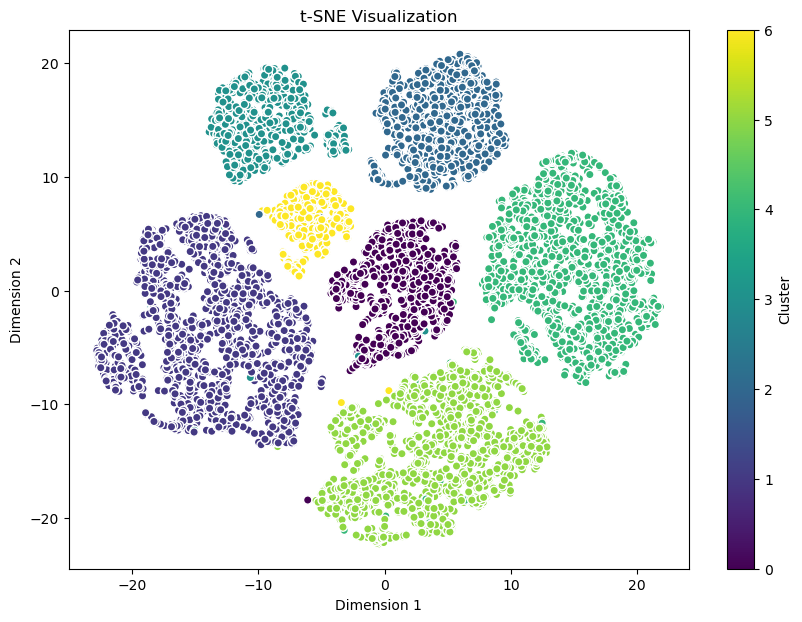

In [ ]:
tsnePlt(df_tsne,GaussianMixtureModel.predict(df_normalized)) #Gausian Mixture visualization with tsne

In [ ]:
# # Save variable to a file
# with open('GaussianMixtureModel.pkl', 'wb') as file:
#     pickle.dump(GaussianMixtureModel, file)

# # # Load variable from the file
# # with open('saved_variable.pkl', 'rb') as file:
# #     loaded_variable = pickle.load(file)

**Clusters Invistigation**

In this section the clusters resulting from the previous section are investigated to determine their distinctive features.

In [ ]:
# np.unique(GaussianMixtureModel.predict(df_normalized))
#np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 0)
print(" Cluster one Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 0))
print(" Cluster two Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 1))
print(" Cluster three Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 2))
print(" Cluster four Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 3))
print(" Cluster five Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 4))
print(" Cluster six Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 5))
print(" Cluster seven Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_normalized) == 6))

 Cluster one Count =  1003
 Cluster two Count =  1962
 Cluster three Count =  1012
 Cluster four Count =  778
 Cluster five Count =  1746
 Cluster six Count =  1682
 Cluster seven Count =  453


From investigating each cluster it was deduced that the clusters distinct properties are:   
1. No purchase done in installment.
2. No one in the go purchase was done. 
3. No cash in advance given by the user.
4. No one in the go purchase was done or cash in advance given by the client.
5. No purchase done in installment and no cash in advance given by the client.
6. No purchases was made by the client.
7. No zero values in the client data.

In [ ]:
cluster_one= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==0])
cluster_two= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==1])
cluster_three= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==2])
cluster_four= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==3])
cluster_five= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==4])
cluster_six= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==5])
cluster_seven= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_normalized)==6])

In [ ]:
cluster_one.describe() # INSTALLMENTS_PURCHASES +  CASH_ADVANCE

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1003.000000        1003.000000   1003.000000       1003.000000   
mean     789.554436           0.791121    905.917936        905.917936   
std     1198.649414           0.283281   1439.225229       1439.225229   
min        0.000000           0.000000      0.010000          0.010000   
25%       54.122495           0.545455    159.205000        159.205000   
50%      287.493279           1.000000    456.700000        456.700000   
75%     1111.850419           1.000000   1030.600000       1030.600000   
max    12323.845360           1.000000  17945.000000      17945.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                  1003.0        1003.0          1003.000000   
mean                      0.0           0.0             0.362812   
std                       0.0           0.0             0.314544   
min                       0.0           0.0             0.083333   
25%                       0.0           0.0             0.083333   
50%                       0.0           0.0             0.250000   
75%                       0.0           0.0             0.563492   
max                       0.0           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1003.000000                            1003.0   
mean                     0.362812                               0.0   
std                      0.314544                               0.0   
min                      0.083333                               0.0   
25%                      0.083333                               0.0   
50%                      0.250000                               0.0   
75%                      0.563492                               0.0   
max                      1.000000                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1003.0            1003.0    1003.000000   1003.000000   
mean                      0.0               0.0       8.019940   4426.431312   
std                       0.0               0.0      14.174969   3611.028798   
min                       0.0               0.0       0.000000    150.000000   
25%                       0.0               0.0       1.000000   1600.000000   
50%                       0.0               0.0       4.000000   3000.000000   
75%                       0.0               0.0      11.000000   6500.000000   
max                       0.0               0.0     217.000000  25000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1003.000000       1003.000000       1003.000000  1003.000000  
mean    1215.257410        497.152149          0.145077    11.608175  
std     2182.842011       1646.626251          0.300607     1.189195  
min        0.056466          0.055880          0.000000     6.000000  
25%      314.450184        123.273833          0.000000    12.000000  
50%      608.782428        193.086366          0.000000    12.000000  
75%     1379.589837        417.018444          0.090909    12.000000  
max    50721.483360      30528.432400          1.000000    12.000000

In [ ]:
cluster_two.describe() #PURCHASES = 0 

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count   1962.000000        1962.000000     1962.0            1962.0   
mean    2208.719837           0.903538        0.0               0.0   
std     2117.512664           0.198349        0.0               0.0   
min        0.001146           0.090909        0.0               0.0   
25%      827.768723           0.909091        0.0               0.0   
50%     1508.655243           1.000000        0.0               0.0   
75%     2877.995388           1.000000        0.0               0.0   
max    14581.459140           1.000000        0.0               0.0   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                  1962.0   1962.000000               1962.0   
mean                      0.0   2010.280003                  0.0   
std                       0.0   2501.024548                  0.0   
min                       0.0     18.042768                  0.0   
25%                       0.0    380.989479                  0.0   
50%                       0.0   1223.386820                  0.0   
75%                       0.0   2715.454494                  0.0   
max                       0.0  26194.049540                  0.0   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                      1962.0                            1962.0   
mean                          0.0                               0.0   
std                           0.0                               0.0   
min                           0.0                               0.0   
25%                           0.0                               0.0   
50%                           0.0                               0.0   
75%                           0.0                               0.0   
max                           0.0                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1962.000000       1962.000000         1962.0   1962.000000   
mean                 0.277159          6.416922            0.0   4050.722052   
std                  0.202334          8.187407            0.0   3277.232505   
min                  0.083333          1.000000            0.0     50.000000   
25%                  0.100000          2.000000            0.0   1500.000000   
50%                  0.250000          4.000000            0.0   3000.000000   
75%                  0.363636          8.000000            0.0   6000.000000   
max                  1.500000        123.000000            0.0  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1962.000000       1962.000000       1962.000000  1962.000000  
mean    1714.954091       1005.850808          0.046007    11.358308  
std     2750.937845       2618.769477          0.140612     1.499126  
min        0.049513          0.117036          0.000000     6.000000  
25%      395.410669        267.130336          0.000000    12.000000  
50%      803.791637        487.876487          0.000000    12.000000  
75%     1778.707091       1009.831840          0.000000    12.000000  
max    34107.074990      61031.618600          1.000000    12.000000

In [ ]:
cluster_three.describe() # None = 0

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1012.000000        1012.000000   1012.000000       1012.000000   
mean    2828.066770           0.970120   1927.788251       1157.447460   
std     2618.066475           0.089857   2537.876393       1938.789772   
min        2.299436           0.181818      0.000000          0.000000   
25%      894.763339           1.000000    598.770000        225.120000   
50%     1994.252772           1.000000   1227.040000        610.470000   
75%     4005.732719           1.000000   2385.972500       1394.737500   
max    16259.448570           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1012.000000   1012.000000          1012.000000   
mean               771.059792   2086.784103             0.777264   
std               1036.915424   3107.866549             0.247892   
min                  0.000000     14.222216             0.000000   
25%                183.000000    399.128295             0.583333   
50%                446.615000   1116.127769             0.857143   
75%               1012.895000   2646.855311             1.000000   
max              13184.430000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1012.000000                       1012.000000   
mean                     0.394645                          0.628127   
std                      0.289648                          0.309580   
min                      0.000000                          0.000000   
25%                      0.166667                          0.363636   
50%                      0.333333                          0.666667   
75%                      0.583333                          0.916667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1012.000000       1012.000000    1012.000000   1012.000000   
mean                 0.291813          7.746047      30.385375   5812.263944   
std                  0.213305          9.740842      29.763753   4146.831737   
min                  0.083333          1.000000       0.000000    300.000000   
25%                  0.083333          2.000000      11.000000   2500.000000   
50%                  0.250000          4.000000      21.000000   5000.000000   
75%                  0.416667         10.000000      39.000000   8000.000000   
max                  1.000000        123.000000     308.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1012.000000       1012.000000       1012.000000  1012.000000  
mean    3033.088475       1246.123343          0.069474    11.625494  
std     4084.360799       1770.975100          0.176262     1.175526  
min       48.594194         27.398111          0.000000     6.000000  
25%      885.728119        336.201755          0.000000    12.000000  
50%     1758.747511        749.080720          0.000000    12.000000  
75%     3551.298659       1459.563178          0.083333    12.000000  
max    46930.598240      22011.779800          1.000000    12.000000

In [ ]:
cluster_four.describe() # INSTALLMENTS_PURCHASES =0

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    778.000000         778.000000    778.000000        778.000000   
mean    2368.080402           0.933470    664.628728        664.628728   
std     2285.450546           0.151786   1520.295890       1520.295890   
min        1.599053           0.181818      0.000000          0.000000   
25%      853.157402           1.000000    110.385000        110.385000   
50%     1612.065247           1.000000    285.570000        285.570000   
75%     3154.941241           1.000000    719.430000        719.430000   
max    15258.225900           1.000000  22101.780000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                   778.0    778.000000           778.000000   
mean                      0.0   2048.585635             0.276917   
std                       0.0   2503.700540             0.253774   
min                       0.0     18.280043             0.000000   
25%                       0.0    365.839187             0.083333   
50%                       0.0   1159.728594             0.166667   
75%                       0.0   2776.214456             0.333333   
max                       0.0  20277.331120             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  778.000000                             778.0   
mean                     0.276917                               0.0   
std                      0.253774                               0.0   
min                      0.000000                               0.0   
25%                      0.083333                               0.0   
50%                      0.166667                               0.0   
75%                      0.333333                               0.0   
max                      1.000000                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              778.000000        778.000000     778.000000    778.000000   
mean                 0.296183          6.907455       6.370180   4655.172938   
std                  0.213040          7.804343      13.692307   3538.162364   
min                  0.083333          1.000000       1.000000    200.000000   
25%                  0.142857          2.000000       1.000000   1962.500000   
50%                  0.250000          5.000000       3.000000   3300.000000   
75%                  0.416667          9.000000       7.000000   6500.000000   
max                  1.250000         93.000000     309.000000  20000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    778.000000        778.000000         778.00000  778.000000  
mean    1975.408588       1025.658996           0.06010   11.345758  
std     2931.872549       1682.212317           0.16835    1.514406  
min       28.654864          3.197940           0.00000    6.000000  
25%      515.663243        263.711073           0.00000   12.000000  
50%     1136.466368        544.259473           0.00000   12.000000  
75%     2249.137822       1161.041879           0.00000   12.000000  
max    39461.965800      19060.534750           1.00000   12.000000

In [ ]:
cluster_five.describe() # CASH_ADVANCE = 0

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1746.000000        1746.000000   1746.000000       1746.000000   
mean    1218.684607           0.936618   2464.667073       1504.510395   
std     1816.061882           0.150645   3499.361920       2782.481781   
min        0.704307           0.166667     34.000000          0.000000   
25%      166.576153           1.000000    727.535000        257.435000   
50%      535.003746           1.000000   1521.520000        759.340000   
75%     1518.695356           1.000000   2841.732500       1734.092500   
max    19043.138560           1.000000  41050.400000      40624.060000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1746.000000        1746.0          1746.000000   
mean               961.278671           0.0             0.811967   
std               1342.276786           0.0             0.238833   
min                  0.000000           0.0             0.083333   
25%                229.140000           0.0             0.666667   
50%                544.865000           0.0             0.916667   
75%               1172.702500           0.0             1.000000   
max              15497.190000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1746.000000                       1746.000000   
mean                     0.457907                          0.646716   
std                      0.333590                          0.313220   
min                      0.000000                          0.000000   
25%                      0.166667                          0.416667   
50%                      0.333333                          0.666667   
75%                      0.750000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1746.0            1746.0    1746.000000   1746.000000   
mean                      0.0               0.0      34.523482   5704.182026   
std                       0.0               0.0      36.568964   4013.341531   
min                       0.0               0.0       0.000000    300.000000   
25%                       0.0               0.0      13.000000   2500.000000   
50%                       0.0               0.0      24.000000   5000.000000   
75%                       0.0               0.0      42.000000   7500.000000   
max                       0.0               0.0     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1746.000000       1746.000000       1746.000000  1746.000000  
mean    2309.004938        611.928829          0.260053    11.802405  
std     3311.911627       1621.029814          0.358964     0.843254  
min       18.125527         13.545097          0.000000     6.000000  
25%      699.198885        169.809316          0.000000    12.000000  
50%     1344.258014        212.726218          0.000000    12.000000  
75%     2601.725507        549.154752          0.500000    12.000000  
max    36066.750680      29019.802880          1.000000    12.000000

In [ ]:
cluster_six.describe() #cash Advance = 0 , ONEOFF_PURCHASES=0

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1682.000000        1682.000000   1682.000000            1682.0   
mean     417.062700           0.824279    553.446088               0.0   
std      937.525092           0.257182    903.542386               0.0   
min        0.000000           0.000000      0.000000               0.0   
25%       21.723607           0.636364    166.777500               0.0   
50%       62.849886           1.000000    337.500000               0.0   
75%      339.378323           1.000000    623.757500               0.0   
max    11670.179850           1.000000  22500.000000               0.0   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1682.000000        1682.0          1682.000000   
mean               553.446088           0.0             0.715356   
std                903.542386           0.0             0.299014   
min                  0.000000           0.0             0.083333   
25%                166.777500           0.0             0.500000   
50%                337.500000           0.0             0.833333   
75%                623.757500           0.0             1.000000   
max              22500.000000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                      1682.0                       1682.000000   
mean                          0.0                          0.680855   
std                           0.0                          0.302505   
min                           0.0                          0.083333   
25%                           0.0                          0.416667   
50%                           0.0                          0.750000   
75%                           0.0                          1.000000   
max                           0.0                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1682.0            1682.0    1682.000000   1682.000000   
mean                      0.0               0.0      12.011891   3103.812951   
std                       0.0               0.0      12.267390   2714.751340   
min                       0.0               0.0       0.000000    300.000000   
25%                       0.0               0.0       6.000000   1262.500000   
50%                       0.0               0.0      10.000000   2500.000000   
75%                       0.0               0.0      12.000000   4000.000000   
max                       0.0               0.0     199.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1682.000000       1682.000000       1682.000000  1682.000000  
mean     768.124763        717.821141          0.325338    11.508918  
std     1173.710140       3355.552496          0.371401     1.369847  
min        4.841543          0.019163          0.000000     6.000000  
25%      229.267357        117.359998          0.000000    12.000000  
50%      442.807927        164.367894          0.166667    12.000000  
75%      885.039304        215.266274          0.666667    12.000000  
max    23150.571840      76406.207520          1.000000    12.000000

In [ ]:
cluster_seven.describe() #ONEOFF_PURCHASES = 0

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    453.000000         453.000000    453.000000             453.0   
mean    2580.692816           0.956986    540.404768               0.0   
std     2598.649321           0.125165    852.588699               0.0   
min        1.097736           0.181818      4.440000               0.0   
25%      882.715792           1.000000    159.960000               0.0   
50%     1648.217916           1.000000    339.960000               0.0   
75%     3347.229846           1.000000    649.500000               0.0   
max    16304.889250           1.000000  14686.100000               0.0   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              453.000000    453.000000           453.000000   
mean               540.404768   2066.016150             0.654742   
std                852.588699   2559.811535             0.314586   
min                  4.440000     18.531069             0.083333   
25%                159.960000    493.377807             0.363636   
50%                339.960000   1136.000468             0.750000   
75%                649.500000   2683.566903             1.000000   
max              14686.100000  19862.878440             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                       453.0                        453.000000   
mean                          0.0                          0.607290   
std                           0.0                          0.315427   
min                           0.0                          0.083333   
25%                           0.0                          0.333333   
50%                           0.0                          0.666667   
75%                           0.0                          0.909091   
max                           0.0                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              453.000000        453.000000     453.000000    453.000000   
mean                 0.262292          6.216336      12.350993   4374.613687   
std                  0.195549          8.998869      19.642332   3616.497675   
min                  0.083333          1.000000       1.000000    500.000000   
25%                  0.083333          2.000000       5.000000   1500.000000   
50%                  0.166667          4.000000       9.000000   3000.000000   
75%                  0.333333          7.000000      13.000000   6000.000000   
max                  1.000000        123.000000     347.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    453.000000        453.000000        453.000000  453.000000  
mean    1980.679612       1450.711212          0.047754   11.315673  
std     3092.035176       2538.967025          0.129108    1.623840  
min       32.924384          9.801394          0.000000    6.000000  
25%      593.859264        355.119488          0.000000   12.000000  
50%     1145.269760        816.929180          0.000000   12.000000  
75%     2069.375056       1592.560164          0.000000   12.000000  
max    40627.595240      31871.363790          1.000000   12.000000

In [ ]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
# cluster_one['INSTALLMENTS_PURCHASES'].plot(kind='hist', ax=axes[0], title="Cluster_one_INSTALLMENTS_PURCHASES")
# cluster_one['CASH_ADVANCE'].plot(kind='hist', ax=axes[1], title="Cluster_one_CASH_ADVANCE")


To validate the accuracy of the insights derived for each cluster, a thorough examination of the original data was conducted using the identified insights. The results demonstrated that, based on the insights, only 30 points out of 8363 were misclassified. This outcome confirms the validity of the insights. Also, it is deduced that not always the silhouette score is not always the best criteria for comparing different clusters as in somecases better results were optained having low scores.

In [162]:
cash_only_zero_values_count = ((df_copy['CASH_ADVANCE'] == 0) & (df_copy['PURCHASES'] != 0) & (df_copy['INSTALLMENTS_PURCHASES'] != 0) & (df_copy['ONEOFF_PURCHASES'] != 0)).sum()
print("cash_only_zero_values_count = ",cash_only_zero_values_count)
installment_only_zero_values_count = ((df_copy['CASH_ADVANCE'] != 0) & (df_copy['PURCHASES'] != 0) & (df_copy['INSTALLMENTS_PURCHASES'] == 0) & (df_copy['ONEOFF_PURCHASES'] != 0)).sum()
print("installment_only_zero_values_count = ",installment_only_zero_values_count)
one_off_only_zero_values_count = ((df_copy['CASH_ADVANCE'] != 0) & (df_copy['PURCHASES'] != 0) & (df_copy['INSTALLMENTS_PURCHASES'] != 0) & (df_copy['ONEOFF_PURCHASES'] == 0)).sum()
print("one_off_only_zero_values_count = ",one_off_only_zero_values_count)
one_off_cash_advance_zero_values_count = ((df_copy['CASH_ADVANCE'] == 0) & (df_copy['PURCHASES'] != 0) & (df_copy['INSTALLMENTS_PURCHASES'] != 0) & (df_copy['ONEOFF_PURCHASES'] == 0)).sum()
print("one_off_cash_advance_zero_values_count = ",one_off_cash_advance_zero_values_count)
installment_cash_advance_zero_values_count = ((df_copy['CASH_ADVANCE'] == 0) & (df_copy['PURCHASES'] != 0) & (df_copy['INSTALLMENTS_PURCHASES'] == 0) & (df_copy['ONEOFF_PURCHASES'] != 0)).sum()
print("installment_cash_advance_zero_values_count = ",installment_cash_advance_zero_values_count)
purchases_zero_values_count = ((df_copy['CASH_ADVANCE'] != 0) & (df_copy['PURCHASES'] == 0) & (df_copy['INSTALLMENTS_PURCHASES'] == 0) & (df_copy['ONEOFF_PURCHASES'] == 0)).sum()
print("purchases_zero_values_count = ",purchases_zero_values_count)
total = cash_only_zero_values_count +installment_only_zero_values_count+one_off_only_zero_values_count+one_off_cash_advance_zero_values_count+installment_cash_advance_zero_values_count+purchases_zero_values_count
noneCount = len(df_copy) -total
print("Others Count = ",noneCount)

cash_only_zero_values_count =  1733
installment_only_zero_values_count =  777
one_off_only_zero_values_count =  454
one_off_cash_advance_zero_values_count =  1692
installment_cash_advance_zero_values_count =  1005
purchases_zero_values_count =  1964
Others Count =  1011


In [ ]:
cluster_one_miss_class = abs(installment_cash_advance_zero_values_count - len(cluster_one))
cluster_one_miss_class

2

In [ ]:
cluster_two_miss_class = abs(purchases_zero_values_count - len(cluster_two))
cluster_one_miss_class

2

In [ ]:
cluster_three_miss_class = abs(noneCount - len(cluster_three))
cluster_three_miss_class

1

In [ ]:
cluster_four_miss_class= abs(installment_only_zero_values_count - len(cluster_four))
cluster_four_miss_class

1

In [ ]:
cluster_five_miss_class = abs(cash_only_zero_values_count - len(cluster_five))
cluster_five_miss_class

13

In [ ]:
cluster_six_miss_class = abs(one_off_cash_advance_zero_values_count - len(cluster_six))
cluster_six_miss_class

10

In [ ]:
cluster_seven_miss_class = abs(one_off_only_zero_values_count - len(cluster_seven))
cluster_seven_miss_class

1

In [ ]:
totalMissclassified = cluster_one_miss_class+cluster_two_miss_class+cluster_three_miss_class+cluster_four_miss_class+cluster_five_miss_class+cluster_six_miss_class+cluster_seven_miss_class
totalMissclassified

30


## 5. <a name="5">PCA Clustring</a>
(<a href="#0">Go to top</a>)

In this section PCA was utilized to investigate its effect on clustring our data.

In [ ]:
pca = PCA(n_components=5)
df_pca = pd.DataFrame(pca.fit_transform(df_normalized),columns=['1', '2','3','4','5'])
print(pca.explained_variance_ratio_.sum())
df_pca.info()
df_pca_normalized= df_pca
df_pca_normalized=preprocessing.normalize(df_pca, norm='l2')


0.9417142880926612
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       8636 non-null   float64
 1   2       8636 non-null   float64
 2   3       8636 non-null   float64
 3   4       8636 non-null   float64
 4   5       8636 non-null   float64
dtypes: float64(5)
memory usage: 337.5 KB


After applying PCA some features were skwed to the right, which required applying log transform.

In [ ]:
df_pca_normalized=pd.DataFrame(df_pca_normalized)
df_pca_normalized.skew()

0   -0.329873
1    0.043675
2   -0.305744
3   -0.104961
4    1.505594
dtype: float64

In [ ]:
df_pca_normalized[4]=transformer.transform(df_pca_normalized[4].values.reshape((-1,1)))
df_pca_normalized.skew()

0   -0.329873
1    0.043675
2   -0.305744
3   -0.104961
4    0.900885
dtype: float64

Two clustering methods were utilized on PCA which were gausian mixture method and Kmeans as they were the ones producing the best results in previous analysis.

In [ ]:
tsne = TSNE(init='pca',n_components=2, perplexity=35,learning_rate=0.1,n_iter=5000)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca_normalized), columns=['Dimension 1', 'Dimension 2'])

In [ ]:
GaussianMixtureModel=GaussianMixturePlt(df_pca_normalized,n_components=7)

In [ ]:
silhouette_score(df_pca_normalized,GaussianMixtureModel.predict(df_pca_normalized))

0.5088319742128333

In [ ]:
KmeansModel=kmeansPlt(df_pca_normalized,n_clusters=7)

In [ ]:
silhouette_score(df_pca_normalized,KmeansModel.labels_)

0.5180342179055551

Once again, the T-SNE plot has confirmed the presence of 7 distinct clusters, with the Gaussian Mixture Model emerging as the most effective technique out of the analysed models for clustering the data.

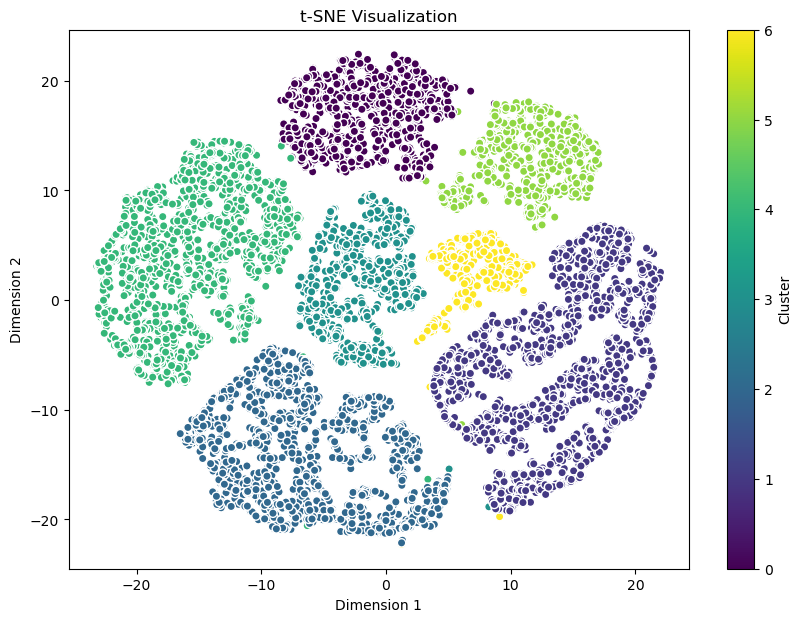

In [ ]:
tsnePlt(df_tsne,GaussianMixtureModel.predict(df_pca_normalized))

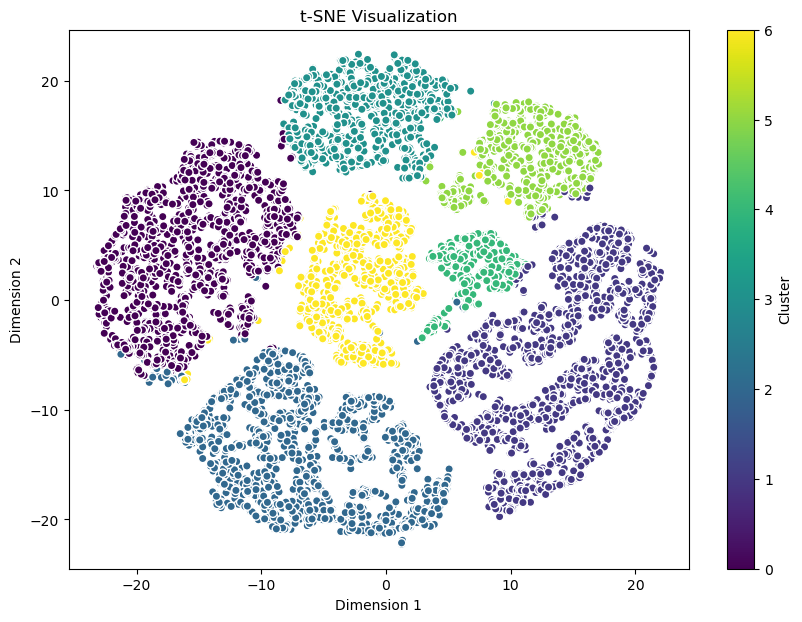

In [ ]:
tsnePlt(df_tsne,KmeansModel.labels_) 

**PCA Cluster Investigation**

In [ ]:
print(" Cluster one Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 0))
print(" Cluster two Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 1))
print(" Cluster three Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 2))
print(" Cluster four Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 3))
print(" Cluster five Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 4))
print(" Cluster six Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 5))
print(" Cluster seven Count = " ,np.count_nonzero(GaussianMixtureModel.predict(df_pca_normalized) == 6))

 Cluster one Count =  985
 Cluster two Count =  1967
 Cluster three Count =  1694
 Cluster four Count =  1008
 Cluster five Count =  1733
 Cluster six Count =  782
 Cluster seven Count =  467


In [ ]:
cluster_one= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==0])
cluster_two= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==1])
cluster_three= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==2])
cluster_four= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==3])
cluster_five= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==4])
cluster_six= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==5])
cluster_seven= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_pca_normalized)==6])

In [ ]:
cluster_one.describe()


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    985.000000         985.000000    985.000000        985.000000   
mean    2843.764846           0.970931   1972.275056       1185.416041   
std     2594.334490           0.089085   2557.480882       1957.512180   
min        2.299436           0.181818     83.000000         25.520000   
25%      909.560162           1.000000    636.840000        232.000000   
50%     2041.480046           1.000000   1283.400000        640.170000   
75%     4037.543707           1.000000   2435.090000       1424.870000   
max    16259.448570           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              985.000000    985.000000           985.000000   
mean               786.881574   2122.149967             0.785622   
std               1045.229639   3137.791911             0.241664   
min                 22.490000     18.561424             0.083333   
25%                191.340000    418.482499             0.583333   
50%                452.860000   1168.493188             0.888889   
75%               1029.980000   2671.441618             1.000000   
max              13184.430000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  985.000000                        985.000000   
mean                     0.400855                          0.635939   
std                      0.290015                          0.306006   
min                      0.083333                          0.083333   
25%                      0.166667                          0.416667   
50%                      0.333333                          0.666667   
75%                      0.583333                          0.916667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              985.000000        985.000000     985.000000    985.000000   
mean                 0.294305          7.859898      30.965482   5865.950367   
std                  0.214026          9.832265      29.916327   4137.387449   
min                  0.083333          1.000000       2.000000    300.000000   
25%                  0.090909          2.000000      12.000000   2500.000000   
50%                  0.250000          5.000000      22.000000   5000.000000   
75%                  0.416667         10.000000      39.000000   8000.000000   
max                  1.000000        123.000000     308.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    985.000000        985.000000        985.000000  985.000000  
mean    3090.973498       1256.924978          0.070794   11.626396  
std     4121.359746       1781.568321          0.178300    1.170658  
min       48.594194         27.398111          0.000000    6.000000  
25%      932.414285        342.286490          0.000000   12.000000  
50%     1793.043228        759.107707          0.000000   12.000000  
75%     3620.440772       1480.266330          0.083333   12.000000  
max    46930.598240      22011.779800          1.000000   12.000000

In [ ]:
missClusteringInCluster1 = abs(noneCount -len(cluster_one))
missClusteringInCluster1

26

In [ ]:
cluster_two.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   1967.000000        1967.000000  1967.000000       1967.000000   
mean    2207.538801           0.903413     0.000036          0.000036   
std     2117.080544           0.198400     0.001171          0.001171   
min        0.001146           0.090909     0.000000          0.000000   
25%      828.537027           0.909091     0.000000          0.000000   
50%     1502.444690           1.000000     0.000000          0.000000   
75%     2877.462406           1.000000     0.000000          0.000000   
max    14581.459140           1.000000     0.050000          0.050000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                  1967.0   1967.000000          1967.000000   
mean                      0.0   2012.261313             0.000131   
std                       0.0   2501.283216             0.003354   
min                       0.0     18.042768             0.000000   
25%                       0.0    381.126213             0.000000   
50%                       0.0   1224.607415             0.000000   
75%                       0.0   2717.719705             0.000000   
max                       0.0  26194.049540             0.090909   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1967.000000                            1967.0   
mean                     0.000131                               0.0   
std                      0.003354                               0.0   
min                      0.000000                               0.0   
25%                      0.000000                               0.0   
50%                      0.000000                               0.0   
75%                      0.000000                               0.0   
max                      0.090909                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1967.000000       1967.000000    1967.000000   1967.000000   
mean                 0.276982          6.418404       0.003050   4050.338926   
std                  0.202155          8.179343       0.063717   3279.607234   
min                  0.083333          1.000000       0.000000     50.000000   
25%                  0.100000          2.000000       0.000000   1500.000000   
50%                  0.250000          4.000000       0.000000   3000.000000   
75%                  0.363636          8.000000       0.000000   6000.000000   
max                  1.500000        123.000000       2.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1967.000000       1967.000000       1967.000000  1967.000000  
mean    1714.321470       1004.931375          0.046123    11.358922  
std     2748.274718       2615.733552          0.140606     1.497472  
min        0.049513          0.117036          0.000000     6.000000  
25%      395.436088        266.946686          0.000000    12.000000  
50%      804.570403        487.840515          0.000000    12.000000  
75%     1778.139329       1008.882331          0.000000    12.000000  
max    34107.074990      61031.618600          1.000000    12.000000

In [ ]:
missClusteringInCluster2 = abs(purchases_installment_one_off_zero_values_count -len(cluster_two))
missClusteringInCluster2

3

In [ ]:
cluster_three.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1694.000000        1694.000000   1694.000000       1694.000000   
mean     418.241559           0.823807    555.951718          0.000024   
std      936.852594           0.257400    908.858247          0.000595   
min        0.000000           0.000000      4.800000          0.000000   
25%       21.845404           0.636364    167.760000          0.000000   
50%       62.849886           1.000000    339.720000          0.000000   
75%      340.776525           1.000000    623.757500          0.000000   
max    11670.179850           1.000000  22500.000000          0.020000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1694.000000        1694.0          1694.000000   
mean               557.010767           0.0             0.715723   
std                910.911544           0.0             0.298641   
min                  4.800000           0.0             0.083333   
25%                167.760000           0.0             0.500000   
50%                339.875000           0.0             0.833333   
75%                624.630000           0.0             1.000000   
max              22500.000000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1694.000000                       1694.000000   
mean                     0.000148                          0.681096   
std                      0.003505                          0.302277   
min                      0.000000                          0.083333   
25%                      0.000000                          0.416667   
50%                      0.000000                          0.750000   
75%                      0.000000                          1.000000   
max                      0.083333                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1694.0            1694.0    1694.000000   1694.000000   
mean                      0.0               0.0      12.091499   3109.216874   
std                       0.0               0.0      12.388113   2719.095276   
min                       0.0               0.0       0.000000    300.000000   
25%                       0.0               0.0       6.000000   1212.500000   
50%                       0.0               0.0      10.000000   2500.000000   
75%                       0.0               0.0      12.000000   4000.000000   
max                       0.0               0.0     199.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1694.000000       1694.000000       1694.000000  1694.000000  
mean     770.664876        714.896884          0.325395    11.505903  
std     1176.809033       3343.958982          0.371720     1.373842  
min        4.841543          0.019163          0.000000     6.000000  
25%      229.561587        116.657812          0.000000    12.000000  
50%      443.805390        164.305157          0.166667    12.000000  
75%      885.039304        215.266274          0.666667    12.000000  
max    23150.571840      76406.207520          1.000000    12.000000

In [ ]:
missClusteringInCluster3 = abs(one_off_cash_advance_zero_values_count -len(cluster_three))
missClusteringInCluster3

2

In [ ]:
cluster_four.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1008.000000        1008.000000   1008.000000       1008.000000   
mean     791.206192           0.791886    902.334266        902.364484   
std     1197.472917           0.282889   1436.598156       1436.606535   
min        0.000000           0.000000      0.000000          0.000000   
25%       54.186429           0.545455    158.240000        158.240000   
50%      288.171251           1.000000    453.445000        453.445000   
75%     1117.173503           1.000000   1028.052500       1028.052500   
max    12323.845360           1.000000  17945.000000      17945.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1008.000000   1008.000000          1008.000000   
mean                 0.062966      0.032169             0.362794   
std                  1.430734      0.727277             0.313861   
min                  0.000000      0.000000             0.083333   
25%                  0.000000      0.000000             0.083333   
50%                  0.000000      0.000000             0.250000   
75%                  0.000000      0.000000             0.547980   
max                 36.790000     18.204577             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1008.000000                       1008.000000   
mean                     0.361959                          0.000594   
std                      0.314187                          0.012236   
min                      0.000000                          0.000000   
25%                      0.083333                          0.000000   
50%                      0.250000                          0.000000   
75%                      0.547980                          0.000000   
max                      1.000000                          0.333333   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1008.000000       1008.000000    1008.000000   1008.000000   
mean                 0.000173          0.001984       8.006944   4419.058141   
std                  0.003882          0.044521      14.145539   3606.525123   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       4.000000   3000.000000   
75%                  0.000000          0.000000      11.000000   6500.000000   
max                  0.090909          1.000000     217.000000  25000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1008.000000       1008.000000       1008.000000  1008.000000  
mean    1211.260221        497.517290          0.144358    11.609127  
std     2178.222558       1642.853044          0.300033     1.186650  
min        0.056466          0.055880          0.000000     6.000000  
25%      313.920149        123.724716          0.000000    12.000000  
50%      608.230077        193.380914          0.000000    12.000000  
75%     1370.734085        417.384464          0.090909    12.000000  
max    50721.483360      30528.432400          1.000000    12.000000

In [ ]:
missClusteringInCluster4 = abs(installment_cash_advance_zero_values_count -len(cluster_four))
missClusteringInCluster4

3

In [ ]:
cluster_five.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1733.000000        1733.000000   1733.000000       1733.000000   
mean    1223.570256           0.938188   2477.273826       1515.771016   
std     1820.589932           0.147771   3507.297304       2789.833746   
min        0.704307           0.166667     34.000000          1.400000   
25%      168.909599           1.000000    740.110000        265.920000   
50%      535.291589           1.000000   1534.120000        769.410000   
75%     1518.813947           1.000000   2855.040000       1744.630000   
max    19043.138560           1.000000  41050.400000      40624.060000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1733.000000   1733.000000          1733.000000   
mean               961.531085      0.032954             0.813468   
std               1340.579022      0.792124             0.237764   
min                  1.950000      0.000000             0.083333   
25%                229.130000      0.000000             0.666667   
50%                545.050000      0.000000             0.916667   
75%               1174.000000      0.000000             1.000000   
max              15497.190000     19.841346             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1733.000000                       1733.000000   
mean                     0.461294                          0.647676   
std                      0.332536                          0.312779   
min                      0.083333                          0.083333   
25%                      0.166667                          0.416667   
50%                      0.363636                          0.666667   
75%                      0.750000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1733.000000       1733.000000    1733.000000   1733.000000   
mean                 0.000144          0.001731      34.654357   5710.560772   
std                  0.003465          0.041582      36.631584   4012.982370   
min                  0.000000          0.000000       2.000000    300.000000   
25%                  0.000000          0.000000      13.000000   2500.000000   
50%                  0.000000          0.000000      24.000000   5000.000000   
75%                  0.000000          0.000000      42.000000   7500.000000   
max                  0.083333          1.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1733.000000       1733.000000       1733.000000  1733.000000  
mean    2302.843947        613.133661          0.259459    11.807271  
std     3257.482141       1626.476457          0.358528     0.830853  
min       18.125527         13.545097          0.000000     6.000000  
25%      707.157146        169.879335          0.000000    12.000000  
50%     1350.435597        212.770698          0.000000    12.000000  
75%     2605.175646        548.880214          0.500000    12.000000  
max    36066.750680      29019.802880          1.000000    12.000000

In [ ]:
missClusteringInCluster5 = abs(cash_only_zero_values_count -len(cluster_five))
missClusteringInCluster5

0

In [ ]:
cluster_six.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    782.000000         782.000000    782.000000        782.000000   
mean    2363.519817           0.933732    664.438542        664.655230   
std     2279.540173           0.151103   1516.125380       1516.110555   
min        1.599053           0.181818      1.000000          1.000000   
25%      853.157402           1.000000    113.385000        113.385000   
50%     1618.593321           1.000000    289.000000        289.000000   
75%     3142.598548           1.000000    715.480000        715.480000   
max    15258.225900           1.000000  22101.780000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              782.000000    782.000000           782.000000   
mean                 0.192097   2028.013286             0.279594   
std                  1.991153   2493.508002             0.253722   
min                  0.000000     18.280043             0.083333   
25%                  0.000000    364.113518             0.083333   
50%                  0.000000   1148.230358             0.166667   
75%                  0.000000   2746.433534             0.333333   
max                 29.860000  20277.331120             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  782.000000                        782.000000   
mean                     0.278368                          0.001598   
std                      0.253157                          0.020812   
min                      0.083333                          0.000000   
25%                      0.083333                          0.000000   
50%                      0.166667                          0.000000   
75%                      0.333333                          0.000000   
max                      1.000000                          0.500000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              782.000000        782.000000     782.000000    782.000000   
mean                 0.296324          6.887468       6.387468   4640.632411   
std                  0.213070          7.791957      13.656458   3522.198924   
min                  0.083333          1.000000       1.000000    200.000000   
25%                  0.142857          2.000000       1.000000   1950.000000   
50%                  0.250000          4.000000       3.000000   3300.000000   
75%                  0.416667          9.000000       7.000000   6500.000000   
max                  1.250000         93.000000     309.000000  20000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    782.000000        782.000000        782.000000  782.000000  
mean    1966.693935       1022.462753          0.059313   11.338875  
std     2927.829618       1678.116991          0.167686    1.527888  
min       28.654864          3.197940          0.000000    6.000000  
25%      510.539829        262.346142          0.000000   12.000000  
50%     1118.962344        544.769899          0.000000   12.000000  
75%     2246.701196       1156.390956          0.000000   12.000000  
max    39461.965800      19060.534750          1.000000   12.000000

In [ ]:
missClusteringInCluster6 = abs(installment_only_zero_values_count -len(cluster_six))
missClusteringInCluster6

5

In [ ]:
cluster_seven.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    467.000000         467.000000    467.000000        467.000000   
mean    2591.186694           0.955745    533.007088          0.254711   
std     2669.643396           0.128051    843.288123          2.390296   
min        1.097736           0.181818      0.000000          0.000000   
25%      876.424195           1.000000    158.220000          0.000000   
50%     1628.591333           1.000000    335.680000          0.000000   
75%     3345.264609           1.000000    628.150000          0.000000   
max    16304.889250           1.000000  14686.100000         33.600000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              467.000000    467.000000           467.000000   
mean               533.625482   2036.976812             0.648497   
std                843.181675   2536.981534             0.315687   
min                  4.440000      0.000000             0.000000   
25%                156.495000    466.970249             0.333333   
50%                335.990000   1113.924335             0.666667   
75%                628.150000   2683.188586             1.000000   
max              14686.100000  19862.878440             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  467.000000                        467.000000   
mean                     0.001963                          0.601040   
std                      0.013779                          0.316153   
min                      0.000000                          0.083333   
25%                      0.000000                          0.333333   
50%                      0.000000                          0.666667   
75%                      0.000000                          0.909091   
max                      0.166667                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              467.000000        467.000000     467.000000    467.000000   
mean                 0.260139          6.126338      12.237687   4413.276231   
std                  0.195085          8.893691      19.390200   3695.297060   
min                  0.000000          0.000000       0.000000    500.000000   
25%                  0.083333          2.000000       5.000000   1500.000000   
50%                  0.166667          4.000000       9.000000   3000.000000   
75%                  0.333333          7.000000      13.000000   6000.000000   
max                  1.000000        123.000000     347.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    467.000000        467.000000        467.000000  467.000000  
mean    2010.350784       1444.768976          0.048254   11.336188  
std     3299.994246       2516.728673          0.129298    1.603522  
min       32.924384          9.801394          0.000000    6.000000  
25%      576.102146        349.328504          0.000000   12.000000  
50%     1133.806322        798.909471          0.000000   12.000000  
75%     2069.095864       1592.396401          0.000000   12.000000  
max    40627.595240      31871.363790          1.000000   12.000000

In [ ]:
missClusteringInCluster7 = abs(one_off_only_zero_values_count -len(cluster_seven))
missClusteringInCluster7

13

In [ ]:
totalMissPCA = missClusteringInCluster1+missClusteringInCluster2+missClusteringInCluster3+missClusteringInCluster4+missClusteringInCluster5+missClusteringInCluster6+missClusteringInCluster7
print("total missclassified points using PCA = ", totalMissPCA, "points")

total missclassified points using PCA =  52 points


Despite the computational advantages of using PCA for facilitating the clustering process, it was observed that this approach led to a higher number of misclassifications. This discrepancy might result from the loss of certain feature interactions due to the selection of a specific number of principal components.

## 6. <a name="6">Kernel PCA Clustring</a>
(<a href="#0">Go to top</a>)

In this section kernel PCA was investigated for clustring the data. It was found after investigating different kernels including sigmoid, ploynomial and rbf that the cosine kernel gave the best results so far. Kernel PCA using cosine function produced cluster with the least number of missclassifications in this notebook which were 14 points. 

In [151]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components=5,kernel='cosine')
#explained_variance = np.var(pca, axis=0)
#explained_variance_ratio = explained_variance / np.sum(explained_variance)
#print(pca)
#print("Explained Variance Ratio:", explained_variance_ratio)

df_pca = pd.DataFrame(pca.fit_transform(df_normalized),columns=['1', '2','3','4','5'])
#print(pca.explained_variance_ratio_.sum())
df_pca.info()
df_kernel_pca_normalized= df_pca
#df_kernel_pca_normalized=preprocessing.normalize(df_pca, norm='l2')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       8636 non-null   float64
 1   2       8636 non-null   float64
 2   3       8636 non-null   float64
 3   4       8636 non-null   float64
 4   5       8636 non-null   float64
dtypes: float64(5)
memory usage: 337.5 KB


In [152]:
df_kernel_pca_normalized=pd.DataFrame(df_kernel_pca_normalized)
df_kernel_pca_normalized.skew()

1    0.571968
2   -0.118066
3   -0.027235
4    0.345454
5    1.141275
dtype: float64

In [153]:
transformer = FunctionTransformer(np.log1p, validate=True)
df_kernel_pca_normalized['5']=transformer.transform((df_kernel_pca_normalized['5']).values.reshape((-1,1)))
#df_kernel_pca_normalized['4']=transformer.transform((df_kernel_pca_normalized['4']).values.reshape((-1,1)))
#df_kernel_pca_normalized['3']=transformer.transform((df_kernel_pca_normalized['3']).values.reshape((-1,1)))
#df_kernel_pca_normalized['2']=transformer.transform((df_kernel_pca_normalized['2']).values.reshape((-1,1)))
#df_kernel_pca_normalized['1']=transformer.transform((df_kernel_pca_normalized['1']).values.reshape((-1,1)))
df_kernel_pca_normalized.skew()

1    0.571968
2   -0.118066
3   -0.027235
4    0.345454
5    0.890040
dtype: float64

In [154]:
tsne = TSNE(init='pca',n_components=2, perplexity=50,learning_rate=0.2,n_iter=5000)
df_tsne = pd.DataFrame(tsne.fit_transform(df_kernel_pca_normalized), columns=['Dimension 1', 'Dimension 2'])

In [155]:
KmeansModel=kmeansPlt(df_kernel_pca_normalized,n_clusters=7)

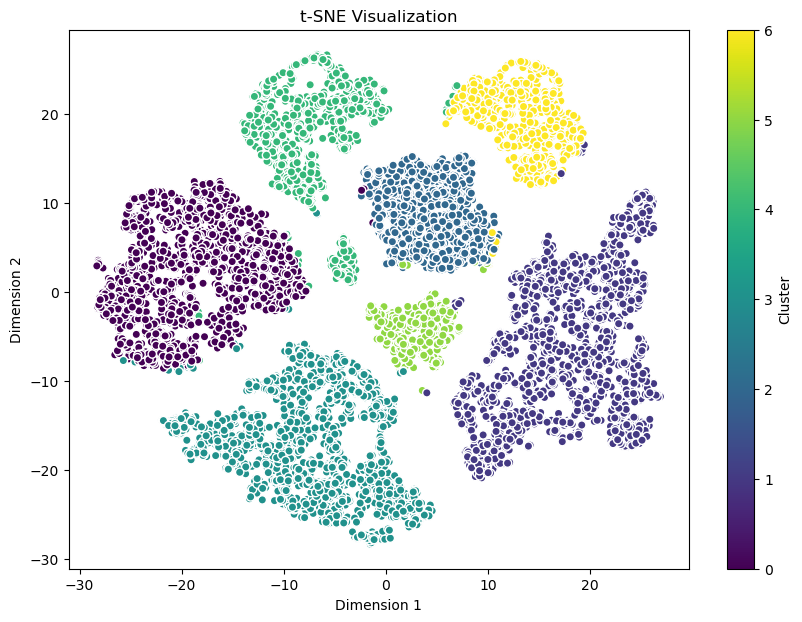

In [156]:
tsnePlt(df_tsne,KmeansModel.labels_) # kmeans clustring visualization for kernel means

In [157]:
GaussianMixtureModel=GaussianMixturePlt(df_kernel_pca_normalized,n_components=7) 

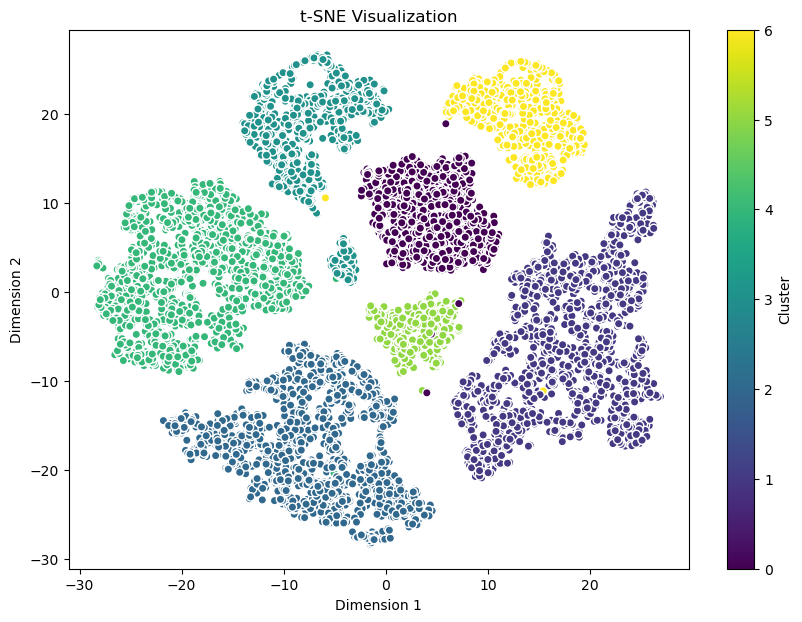

In [158]:
tsnePlt(df_tsne,GaussianMixtureModel.predict(df_kernel_pca_normalized)) #Gausian Mixture model clusters visualization for kernel pca 

Cluster Investigation

After clustering the data, every cluster is investigated to determine the number of missclassifications within it. it was found that the total number of missclassifications is 14.

In [159]:
cluster_one= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_kernel_pca_normalized)==0])
cluster_two= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_kernel_pca_normalized)==1])
cluster_three= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_kernel_pca_normalized)==2])
cluster_four= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_kernel_pca_normalized)==3])
cluster_five= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_kernel_pca_normalized)==4])
cluster_six= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_kernel_pca_normalized)==5])
cluster_seven= pd.DataFrame(df_copy[GaussianMixtureModel.predict(df_kernel_pca_normalized)==6])

In [160]:
cluster_one.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1008.000000        1008.000000   1008.000000       1008.000000   
mean    2825.995321           0.970001   1933.532659       1161.958720   
std     2614.816730           0.090016   2540.996267       1941.308269   
min        2.299436           0.181818      0.000000          0.000000   
25%      894.763339           1.000000    607.832500        226.675000   
50%     1994.252772           1.000000   1231.335000        613.075000   
75%     4005.732719           1.000000   2392.052500       1397.387500   
max    16259.448570           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1008.000000   1008.000000          1008.000000   
mean               771.964931   2090.001461             0.777868   
std               1038.208960   3112.997285             0.247460   
min                  9.650000     14.222216             0.000000   
25%                183.202500    399.128295             0.583333   
50%                446.615000   1116.127769             0.866071   
75%               1012.895000   2646.855311             1.000000   
max              13184.430000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1008.000000                       1008.000000   
mean                     0.395880                          0.628305   
std                      0.289532                          0.309335   
min                      0.000000                          0.083333   
25%                      0.166667                          0.363636   
50%                      0.333333                          0.666667   
75%                      0.583333                          0.916667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1008.000000       1008.000000    1008.000000   1008.000000   
mean                 0.291814          7.751984      30.453373   5819.852293   
std                  0.213390          9.754382      29.798359   4148.493313   
min                  0.083333          1.000000       0.000000    300.000000   
25%                  0.083333          2.000000      11.000000   2500.000000   
50%                  0.250000          4.500000      21.000000   5000.000000   
75%                  0.416667         10.000000      39.000000   8000.000000   
max                  1.000000        123.000000     308.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1008.000000       1008.000000       1008.000000  1008.000000  
mean    3036.715341       1245.508403          0.069750    11.624008  
std     4090.944689       1772.571730          0.176557     1.177621  
min       48.594194         27.398111          0.000000     6.000000  
25%      885.728119        336.201755          0.000000    12.000000  
50%     1758.747511        749.080720          0.000000    12.000000  
75%     3551.298659       1459.563178          0.083333    12.000000  
max    46930.598240      22011.779800          1.000000    12.000000

In [163]:
one_miss=noneCount - len(cluster_one)
one_miss

3

In [164]:
cluster_two.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   1967.000000        1967.000000  1967.000000       1967.000000   
mean    2207.333355           0.903459     0.000036          0.000036   
std     2117.237243           0.198412     0.001171          0.001171   
min        0.001146           0.090909     0.000000          0.000000   
25%      828.537027           0.909091     0.000000          0.000000   
50%     1502.444690           1.000000     0.000000          0.000000   
75%     2877.462406           1.000000     0.000000          0.000000   
max    14581.459140           1.000000     0.050000          0.050000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                  1967.0   1967.000000          1967.000000   
mean                      0.0   2009.375304             0.000300   
std                       0.0   2500.327686             0.008228   
min                       0.0      0.000000             0.000000   
25%                       0.0    380.311523             0.000000   
50%                       0.0   1222.166225             0.000000   
75%                       0.0   2713.655070             0.000000   
max                       0.0  26194.049540             0.333333   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1967.000000                       1967.000000   
mean                     0.000131                          0.000169   
std                      0.003354                          0.007516   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.000000                          0.000000   
max                      0.090909                          0.333333   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1967.000000       1967.000000    1967.000000   1967.000000   
mean                 0.276728          6.415353       0.003050   4052.347060   
std                  0.202188          8.180618       0.063717   3278.365619   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.100000          2.000000       0.000000   1500.000000   
50%                  0.250000          4.000000       0.000000   3000.000000   
75%                  0.363636          8.000000       0.000000   6000.000000   
max                  1.500000        123.000000       2.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1967.000000       1967.000000       1967.000000  1967.000000  
mean    1710.570875       1004.838678          0.045897    11.358922  
std     2745.311491       2615.757868          0.140322     1.497472  
min        0.049513          0.117036          0.000000     6.000000  
25%      395.260661        266.765542          0.000000    12.000000  
50%      804.063354        487.840515          0.000000    12.000000  
75%     1775.234706       1008.882331          0.000000    12.000000  
max    34107.074990      61031.618600          1.000000    12.000000

In [165]:
two_miss=abs(purchases_zero_values_count - len(cluster_two))
two_miss

3

In [166]:
cluster_three.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1694.000000        1694.000000   1694.000000       1694.000000   
mean     418.226028           0.823700    555.907550          0.000024   
std      936.859241           0.257592    908.877128          0.000595   
min        0.000000           0.000000      4.800000          0.000000   
25%       21.765719           0.636364    167.447500          0.000000   
50%       62.849886           1.000000    339.720000          0.000000   
75%      340.776525           1.000000    623.757500          0.000000   
max    11670.179850           1.000000  22500.000000          0.020000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1694.000000        1694.0          1694.000000   
mean               556.741865           0.0             0.715231   
std                910.963788           0.0             0.298996   
min                  4.800000           0.0             0.083333   
25%                167.447500           0.0             0.500000   
50%                339.720000           0.0             0.833333   
75%                624.630000           0.0             1.000000   
max              22500.000000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1694.000000                       1694.000000   
mean                     0.000148                          0.680555   
std                      0.003505                          0.302526   
min                      0.000000                          0.083333   
25%                      0.000000                          0.416667   
50%                      0.000000                          0.750000   
75%                      0.000000                          1.000000   
max                      0.083333                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1694.0            1694.0    1694.000000   1694.000000   
mean                      0.0               0.0      12.070838   3114.824902   
std                       0.0               0.0      12.379066   2731.732730   
min                       0.0               0.0       0.000000    300.000000   
25%                       0.0               0.0       6.000000   1212.500000   
50%                       0.0               0.0      10.000000   2500.000000   
75%                       0.0               0.0      12.000000   4000.000000   
max                       0.0               0.0     199.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1694.000000       1694.000000       1694.000000  1694.000000  
mean     787.680810        715.508764          0.325690    11.505903  
std     1361.875511       3343.933115          0.371660     1.373842  
min        4.841543          0.019163          0.000000     6.000000  
25%      229.758413        116.874035          0.000000    12.000000  
50%      444.656877        164.367894          0.166667    12.000000  
75%      886.286370        215.916776          0.666667    12.000000  
max    28988.973880      76406.207520          1.000000    12.000000

In [167]:
three_miss=abs(one_off_cash_advance_zero_values_count - len(cluster_three))
three_miss

2

In [168]:
cluster_four.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1005.000000        1005.000000   1005.000000       1005.000000   
mean     789.894348           0.791265    904.646517        904.739980   
std     1198.223787           0.283082   1438.106484       1438.082319   
min        0.000000           0.000000      0.010000          0.010000   
25%       53.994628           0.545455    158.950000        158.950000   
50%      287.493279           1.000000    456.700000        456.700000   
75%     1117.003540           1.000000   1029.290000       1029.290000   
max    12323.845360           1.000000  17945.000000      17945.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                  1005.0        1005.0          1005.000000   
mean                      0.0           0.0             0.362754   
std                       0.0           0.0             0.314255   
min                       0.0           0.0             0.083333   
25%                       0.0           0.0             0.083333   
50%                       0.0           0.0             0.250000   
75%                       0.0           0.0             0.555556   
max                       0.0           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1005.000000                            1005.0   
mean                     0.362422                               0.0   
std                      0.314374                               0.0   
min                      0.083333                               0.0   
25%                      0.083333                               0.0   
50%                      0.250000                               0.0   
75%                      0.555556                               0.0   
max                      1.000000                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1005.0            1005.0    1005.000000   1005.000000   
mean                      0.0               0.0       8.018905   4420.806573   
std                       0.0               0.0      14.163834   3609.675145   
min                       0.0               0.0       0.000000    150.000000   
25%                       0.0               0.0       1.000000   1600.000000   
50%                       0.0               0.0       4.000000   3000.000000   
75%                       0.0               0.0      11.000000   6500.000000   
max                       0.0               0.0     217.000000  25000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1005.000000       1005.000000       1005.000000  1005.000000  
mean    1213.610086        497.782868          0.144789    11.608955  
std     2181.027435       1645.283623          0.300377     1.188138  
min        0.056466          0.055880          0.000000     6.000000  
25%      314.302968        123.696831          0.000000    12.000000  
50%      608.782428        193.086366          0.000000    12.000000  
75%     1372.421202        417.290247          0.090909    12.000000  
max    50721.483360      30528.432400          1.000000    12.000000

In [169]:
four_miss=abs(installment_cash_advance_zero_values_count - len(cluster_four))
four_miss

0

In [170]:
cluster_five.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1731.000000        1731.000000   1731.000000       1731.000000   
mean    1223.879716           0.938012   2479.470583       1517.184934   
std     1821.437345           0.148249   3508.715525       2791.136568   
min        0.704307           0.166667     34.000000          0.000000   
25%      168.964547           1.000000    740.405000        267.710000   
50%      535.291589           1.000000   1535.490000        771.580000   
75%     1518.576765           1.000000   2855.805000       1746.805000   
max    19043.138560           1.000000  41050.400000      40624.060000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1731.000000        1731.0          1731.000000   
mean               962.546597           0.0             0.813589   
std               1341.026346           0.0             0.237550   
min                  1.950000           0.0             0.083333   
25%                229.295000           0.0             0.666667   
50%                545.160000           0.0             0.916667   
75%               1175.080000           0.0             1.000000   
max              15497.190000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1731.000000                       1731.000000   
mean                     0.461538                          0.647702   
std                      0.332674                          0.312699   
min                      0.000000                          0.083333   
25%                      0.166667                          0.416667   
50%                      0.375000                          0.666667   
75%                      0.750000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1731.0            1731.0    1731.000000   1731.000000   
mean                      0.0               0.0      34.673021   5717.158763   
std                       0.0               0.0      36.641814   4011.543983   
min                       0.0               0.0       2.000000    300.000000   
25%                       0.0               0.0      13.000000   2500.000000   
50%                       0.0               0.0      24.000000   5000.000000   
75%                       0.0               0.0      42.000000   7500.000000   
max                       0.0               0.0     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1731.000000       1731.000000       1731.000000  1731.000000  
mean    2303.991589        613.445955          0.259706    11.807048  
std     3259.227996       1627.392526          0.358658     0.831307  
min       18.125527         13.545097          0.000000     6.000000  
25%      706.651569        169.859935          0.000000    12.000000  
50%     1350.435597        212.770698          0.000000    12.000000  
75%     2606.789037        549.063240          0.500000    12.000000  
max    36066.750680      29019.802880          1.000000    12.000000

In [171]:
five_miss=abs(cash_only_zero_values_count - len(cluster_five))
five_miss

2

In [172]:
cluster_six.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    456.000000         456.000000    456.000000        456.000000   
mean    2586.316975           0.957269    540.957149          0.000066   
std     2609.317142           0.124800    851.276155          0.001046   
min        1.097736           0.181818      4.440000          0.000000   
25%      882.082301           1.000000    159.870000          0.000000   
50%     1648.039154           1.000000    339.960000          0.000000   
75%     3350.594648           1.000000    649.635000          0.000000   
max    16304.889250           1.000000  14686.100000          0.020000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              456.000000    456.000000           456.000000   
mean               541.612325   2060.461414             0.655552   
std                851.189615   2553.917341             0.314013   
min                  4.440000     18.531069             0.083333   
25%                159.870000    492.865802             0.372159   
50%                341.305000   1133.902290             0.750000   
75%                649.635000   2685.869438             1.000000   
max              14686.100000  19862.878440             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  456.000000                        456.000000   
mean                     0.000548                          0.608412   
std                      0.008718                          0.314947   
min                      0.000000                          0.083333   
25%                      0.000000                          0.333333   
50%                      0.000000                          0.666667   
75%                      0.000000                          0.910985   
max                      0.166667                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              456.000000        456.000000     456.000000    456.000000   
mean                 0.261845          6.197368      12.383772   4371.052632   
std                  0.195163          8.972514      19.586598   3617.045390   
min                  0.083333          1.000000       1.000000    500.000000   
25%                  0.083333          2.000000       5.000000   1500.000000   
50%                  0.166667          4.000000       9.000000   3000.000000   
75%                  0.333333          7.000000      13.000000   6000.000000   
max                  1.000000        123.000000     347.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    456.000000        456.000000         456.00000  456.000000  
mean    1976.169077       1451.871026           0.04744   11.320175  
std     3082.688892       2533.287668           0.12874    1.619425  
min       32.924384          9.801394           0.00000    6.000000  
25%      597.026489        354.678227           0.00000   12.000000  
50%     1144.058481        820.416670           0.00000   12.000000  
75%     2069.708878       1593.569483           0.00000   12.000000  
max    40627.595240      31871.363790           1.00000   12.000000

In [173]:
six_miss=abs(one_off_only_zero_values_count - len(cluster_six))
six_miss

2

In [174]:
cluster_seven.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    775.000000         775.000000    775.000000        775.000000   
mean    2371.013086           0.934033    667.262929        667.307729   
std     2285.159568           0.151010   1522.649070       1522.631327   
min        1.599053           0.181818      0.000000          0.000000   
25%      855.064986           1.000000    112.185000        112.185000   
50%     1621.219401           1.000000    288.000000        288.000000   
75%     3152.167173           1.000000    720.380000        720.380000   
max    15258.225900           1.000000  22101.780000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                   775.0    775.000000           775.000000   
mean                      0.0   2047.698989             0.277872   
std                       0.0   2503.392037             0.253821   
min                       0.0     18.280043             0.000000   
25%                       0.0    366.450217             0.083333   
50%                       0.0   1160.283340             0.166667   
75%                       0.0   2773.220946             0.333333   
max                       0.0  20277.331120             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  775.000000                             775.0   
mean                     0.277764                               0.0   
std                      0.253886                               0.0   
min                      0.000000                               0.0   
25%                      0.083333                               0.0   
50%                      0.166667                               0.0   
75%                      0.333333                               0.0   
max                      1.000000                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              775.000000        775.000000     775.000000    775.000000   
mean                 0.297388          6.916129       6.388387   4653.386510   
std                  0.213591          7.818810      13.715742   3533.049686   
min                  0.083333          1.000000       0.000000     50.000000   
25%                  0.142857          2.000000       1.000000   1975.000000   
50%                  0.250000          5.000000       3.000000   3500.000000   
75%                  0.416667          9.000000       7.000000   6500.000000   
max                  1.250000         93.000000     309.000000  20000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    775.000000        775.000000        775.000000  775.000000  
mean    1989.288930       1026.936224          0.060315   11.345806  
std     2943.691406       1684.451986          0.168911    1.517054  
min       28.654864          3.197940          0.000000    6.000000  
25%      516.486943        263.962363          0.000000   12.000000  
50%     1144.381323        544.816677          0.000000   12.000000  
75%     2264.213515       1159.753923          0.000000   12.000000  
max    39461.965800      19060.534750          1.000000   12.000000

In [175]:
seven_miss=abs(installment_only_zero_values_count- len(cluster_seven))
seven_miss

2

In [176]:
totalMiss = one_miss + two_miss + three_miss + four_miss + five_miss + six_miss + seven_miss
print("total missclassified points using kernal PCA = ", totalMiss)

total missclassified points using kernal PCA =  14


## 7. <a name="7">Hierarchical Clustering</a>
(<a href="#0">Go to top</a>)


### *Hierarchical Clustering*
In this section hierarichal clustring is used to group the data. Firstly dendogram is used to  group the data based on similarity. latter Agglomerative Clustering is used to get the clusters and visualize them using T-sne

In [29]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

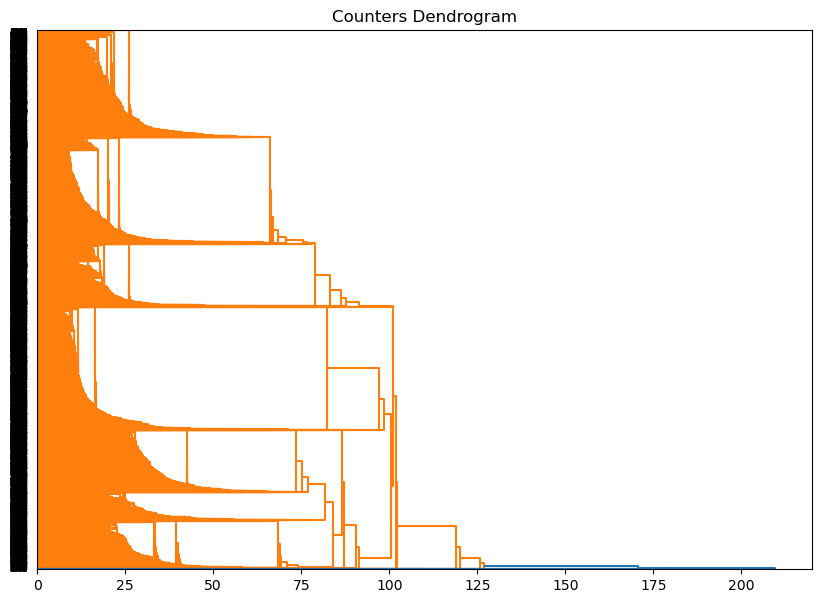

In [ ]:

# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='euclidean')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

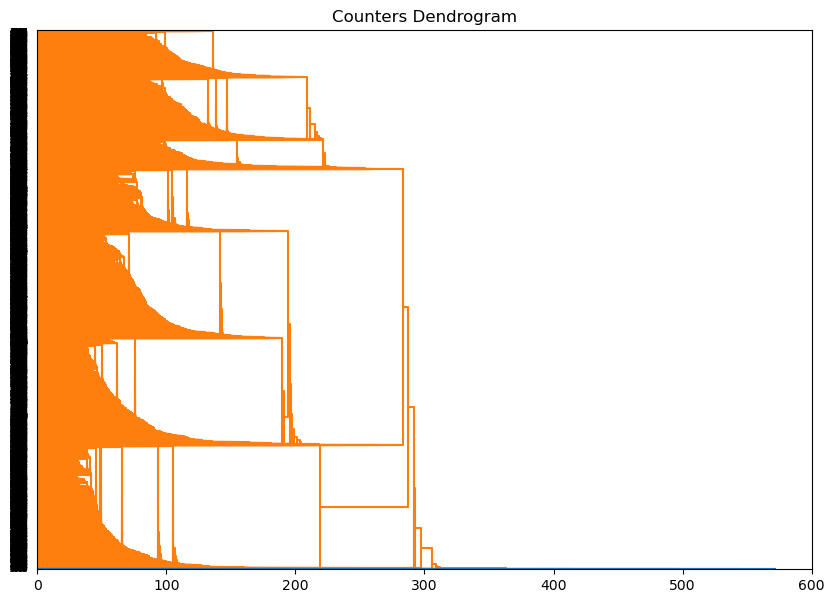

In [ ]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='manhattan')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

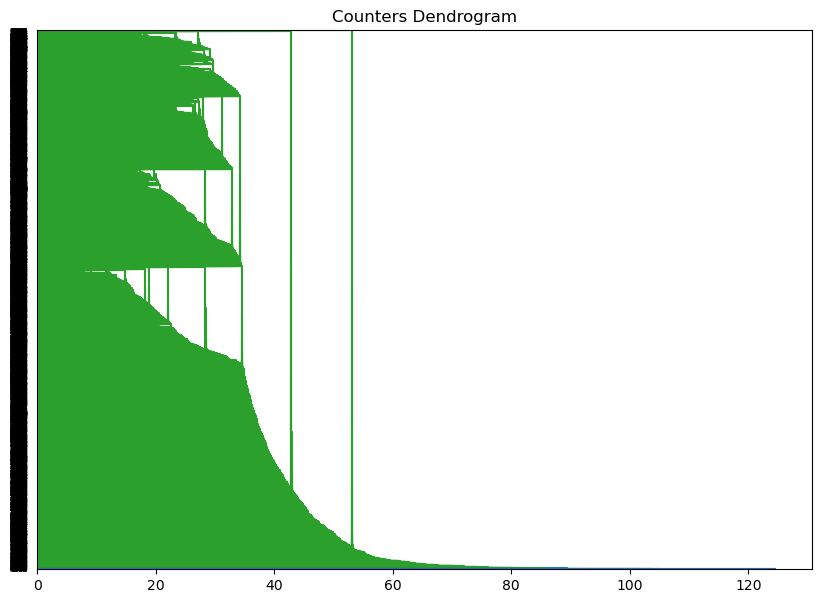

In [ ]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='mahalanobis')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

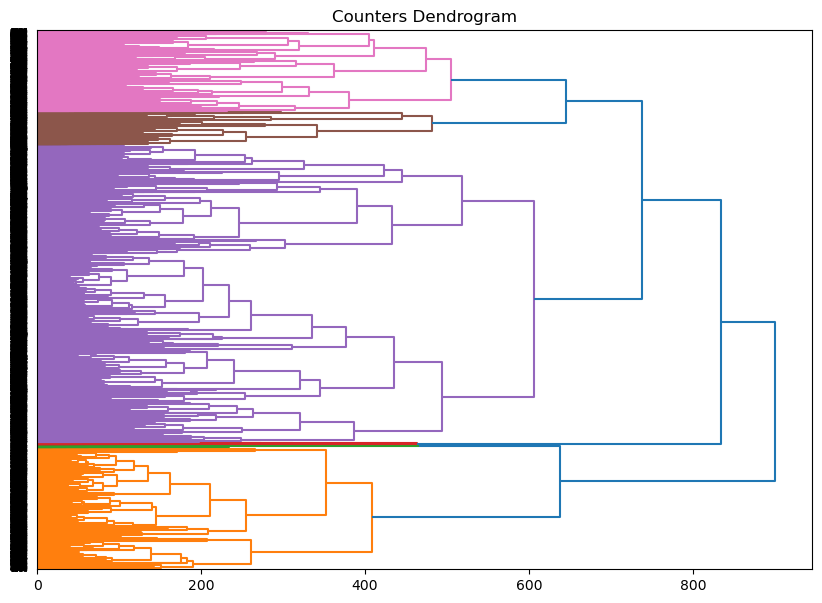

In [28]:
# Calculate the distance matrix

distance_matrix = pairwise_distances(df_normalized, metric='euclidean')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='complete')

# Plot the dendrogram1
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

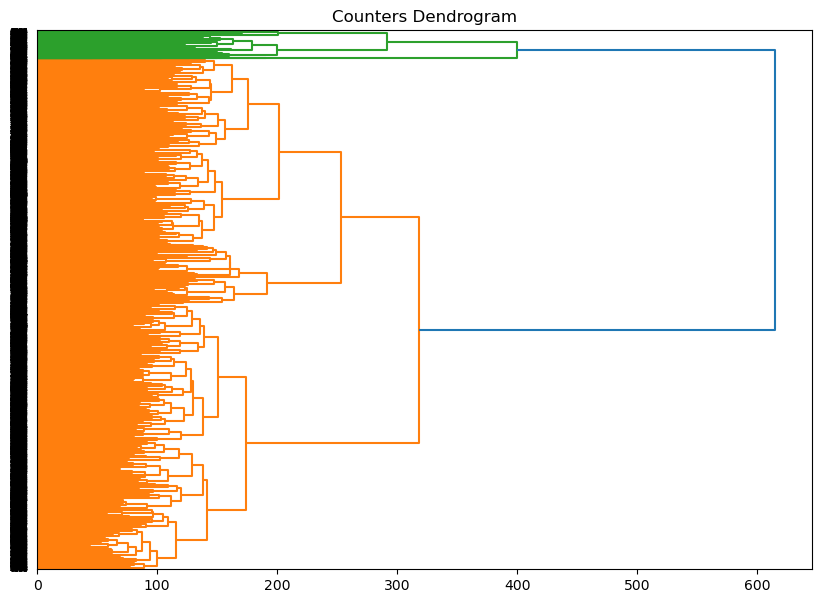

In [ ]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='mahalanobis')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

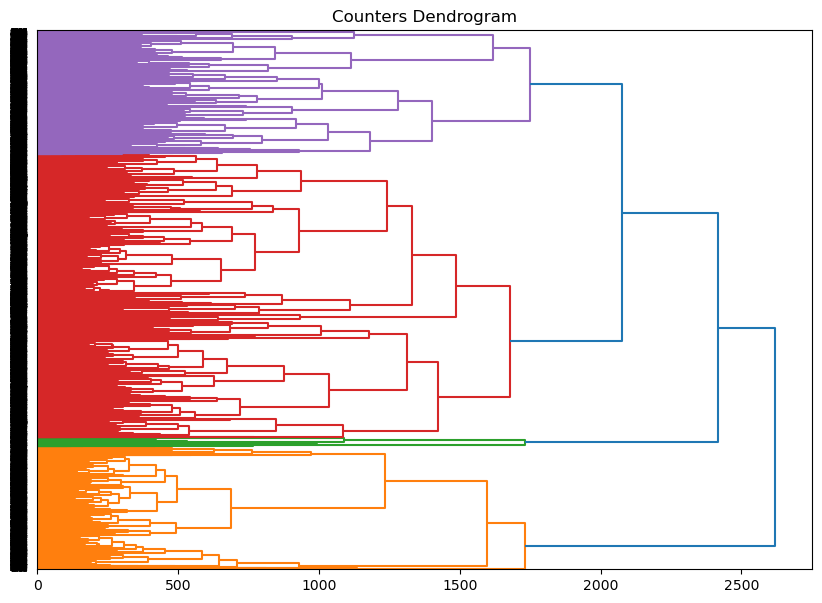

In [ ]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='manhattan')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

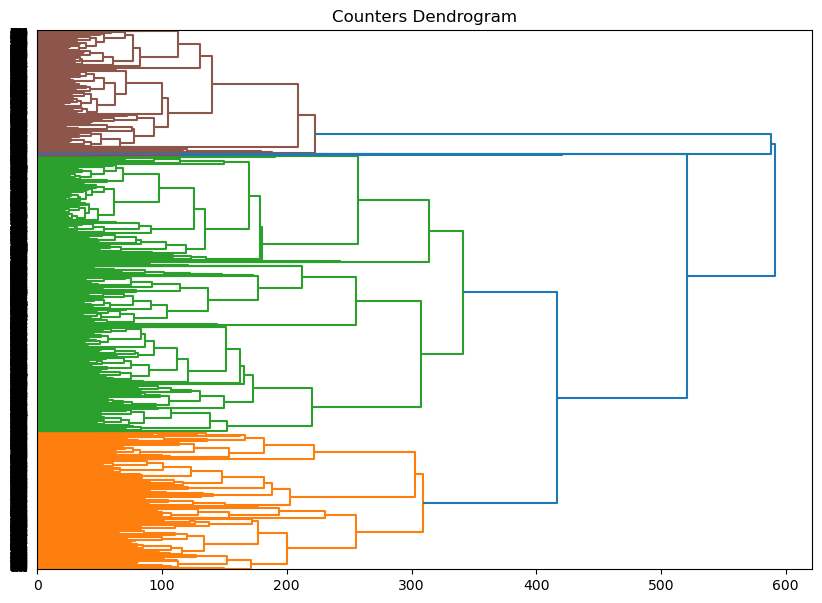

In [ ]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='euclidean')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

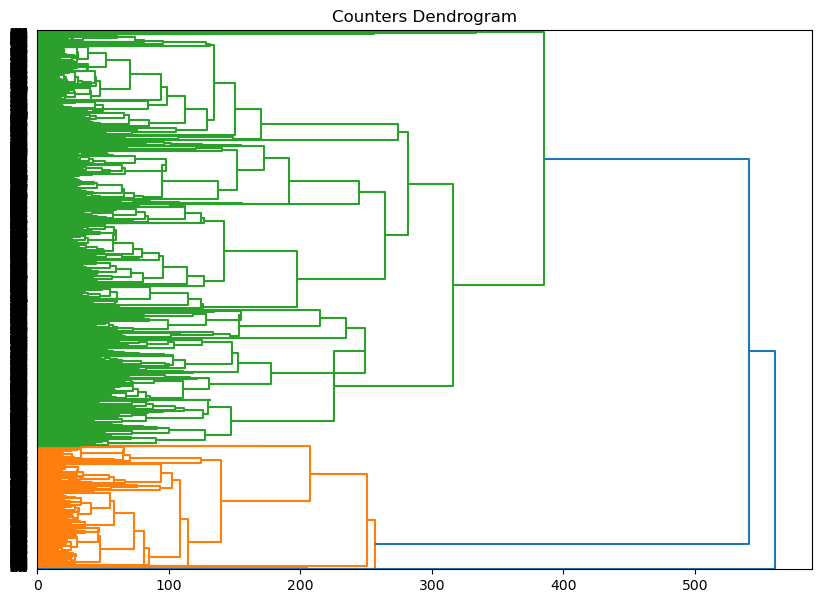

In [ ]:
# Calculate the distance matrix
distance_matrix = pairwise_distances(df_normalized, metric='euclidean')

# Create linkage matrix for hierarchical clustering
linkage_matrix = shc.linkage(distance_matrix, method='centroid')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(linkage_matrix, orientation='right')

plt.show()

Usi

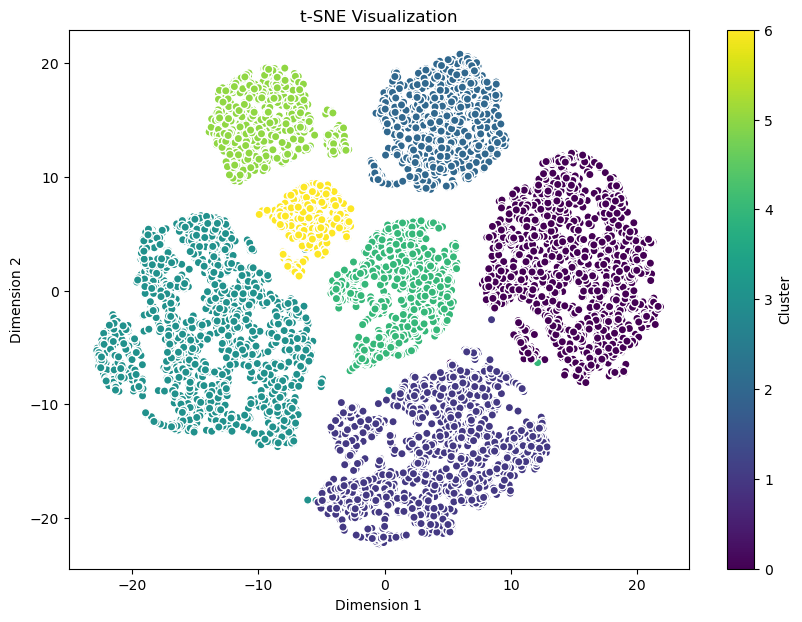

In [34]:
clustering = AgglomerativeClustering(n_clusters=7).fit(df_normalized)
tsnePlt(df_tsne, clustering.labels_)

Cluster Analysis

In [35]:
cluster_one= pd.DataFrame(df_copy[clustering.labels_==0])
cluster_two= pd.DataFrame(df_copy[clustering.labels_==1])
cluster_three= pd.DataFrame(df_copy[clustering.labels_==2])
cluster_four= pd.DataFrame(df_copy[clustering.labels_==3])
cluster_five= pd.DataFrame(df_copy[clustering.labels_==4])
cluster_six= pd.DataFrame(df_copy[clustering.labels_==5])
cluster_seven= pd.DataFrame(df_copy[clustering.labels_==6])

In [36]:
cluster_one.describe() #CASH_ADVANCE = 0

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1725.000000        1725.000000   1725.000000       1725.000000   
mean    1227.339934           0.938499   2487.184586       1521.960504   
std     1823.569535           0.147301   3512.338396       2794.760125   
min        0.704307           0.166667     34.000000          5.000000   
25%      169.088238           1.000000    750.000000        270.000000   
50%      536.425055           1.000000   1547.680000        773.170000   
75%     1520.501423           1.000000   2858.260000       1761.230000   
max    19043.138560           1.000000  41050.400000      40624.060000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1725.000000        1725.0          1725.000000   
mean               965.252487           0.0             0.814696   
std               1342.505436           0.0             0.236384   
min                  7.670000           0.0             0.083333   
25%                232.300000           0.0             0.666667   
50%                545.880000           0.0             0.916667   
75%               1176.510000           0.0             1.000000   
max              15497.190000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1725.000000                       1725.000000   
mean                     0.462306                          0.648924   
std                      0.332382                          0.311961   
min                      0.083333                          0.083333   
25%                      0.166667                          0.416667   
50%                      0.400000                          0.666667   
75%                      0.750000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1725.0            1725.0    1725.000000   1725.000000   
mean                      0.0               0.0      34.756522   5725.769170   
std                       0.0               0.0      36.671709   4013.723625   
min                       0.0               0.0       2.000000    300.000000   
25%                       0.0               0.0      13.000000   2500.000000   
50%                       0.0               0.0      24.000000   5000.000000   
75%                       0.0               0.0      42.000000   7500.000000   
max                       0.0               0.0     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1725.000000       1725.000000        1725.00000  1725.000000  
mean    2309.796085        615.046552           0.26003    11.808116  
std     3263.122372       1629.988429           0.35869     0.829938  
min       18.125527         13.545097           0.00000     6.000000  
25%      708.383328        169.887225           0.00000    12.000000  
50%     1354.420552        214.210554           0.00000    12.000000  
75%     2612.998677        551.633080           0.50000    12.000000  
max    36066.750680      29019.802880           1.00000    12.000000

In [42]:
cluster_one_miss = abs(cash_only_zero_values_count - len(cluster_one))
cluster_one_miss

8

In [37]:
cluster_two.describe() # ONEOFF_PURCHASES=0,cash advance = 0

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1697.000000        1697.000000   1697.000000       1697.000000   
mean     417.720155           0.824020    555.535345          0.005433   
std      936.120165           0.257244    908.101961          0.191873   
min        0.000000           0.000000      9.680000          0.000000   
25%       21.849058           0.636364    167.680000          0.000000   
50%       62.635576           1.000000    339.750000          0.000000   
75%      339.406259           1.000000    623.030000          0.000000   
max    11670.179850           1.000000  22500.000000          7.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1697.000000   1697.000000          1697.000000   
mean               556.600077      0.021428             0.715342   
std                910.150320      0.882733             0.298693   
min                  9.680000      0.000000             0.083333   
25%                167.680000      0.000000             0.500000   
50%                340.000000      0.000000             0.833333   
75%                624.360000      0.000000             1.000000   
max              22500.000000     36.363896             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1697.000000                       1697.000000   
mean                     0.000295                          0.680579   
std                      0.005716                          0.302385   
min                      0.000000                          0.083333   
25%                      0.000000                          0.416667   
50%                      0.000000                          0.750000   
75%                      0.000000                          1.000000   
max                      0.166667                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1697.000000       1697.000000    1697.000000   1697.000000   
mean                 0.000098          0.000589      12.079552   3115.800462   
std                  0.004046          0.024275      12.380663   2731.548346   
min                  0.000000          0.000000       0.000000    300.000000   
25%                  0.000000          0.000000       6.000000   1200.000000   
50%                  0.000000          0.000000      10.000000   2500.000000   
75%                  0.000000          0.000000      12.000000   4000.000000   
max                  0.166667          1.000000     199.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1697.000000       1697.000000       1697.000000  1697.000000  
mean     787.262237        714.355808          0.325163    11.503241  
std     1360.834799       3341.085691          0.371546     1.379224  
min        4.841543          0.019163          0.000000     6.000000  
25%      229.736383        116.450584          0.000000    12.000000  
50%      444.504448        164.248719          0.166667    12.000000  
75%      886.592905        214.877676          0.666667    12.000000  
max    28988.973880      76406.207520          1.000000    12.000000

In [44]:
cluster_two_miss = abs(one_off_cash_advance_zero_values_count - len(cluster_two))
cluster_two_miss

5

In [45]:
cluster_three.describe() #none =0

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1004.000000        1004.000000   1004.000000       1004.000000   
mean    2822.777248           0.969882   1940.274124       1166.586046   
std     2608.350155           0.090175   2543.725037       1943.786557   
min        2.299436           0.181818     64.820000          8.900000   
25%      891.605396           1.000000    612.172500        227.877500   
50%     2003.855857           1.000000   1240.290000        616.625000   
75%     4005.732719           1.000000   2394.680000       1402.025000   
max    16259.448570           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1004.000000   1004.000000          1004.000000   
mean               773.994024   2090.814775             0.780054   
std               1039.599645   3117.372266             0.245020   
min                  9.650000     14.222216             0.083333   
25%                185.335000    399.128295             0.583333   
50%                447.230000   1116.127769             0.875000   
75%               1019.610000   2646.855311             1.000000   
max              13184.430000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1004.000000                       1004.000000   
mean                     0.397291                          0.629895   
std                      0.289230                          0.308755   
min                      0.083333                          0.083333   
25%                      0.166667                          0.375000   
50%                      0.333333                          0.666667   
75%                      0.583333                          0.916667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1004.000000       1004.000000    1004.000000   1004.000000   
mean                 0.292146          7.767928      30.547809   5823.517043   
std                  0.213668          9.769371      29.817101   4145.546055   
min                  0.083333          1.000000       2.000000    300.000000   
25%                  0.083333          2.000000      11.000000   2500.000000   
50%                  0.250000          4.500000      21.000000   5000.000000   
75%                  0.416667         10.000000      39.000000   8000.000000   
max                  1.000000        123.000000     308.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1004.000000       1004.000000       1004.000000  1004.000000  
mean    3045.866879       1243.506759          0.070028    11.622510  
std     4096.300914       1770.171952          0.176853     1.179727  
min       48.594194         27.398111          0.000000     6.000000  
25%      890.920049        336.201755          0.000000    12.000000  
50%     1761.721359        751.973986          0.000000    12.000000  
75%     3570.875073       1459.563178          0.083333    12.000000  
max    46930.598240      22011.779800          1.000000    12.000000

In [46]:
cluster_three_miss = abs(noneCount - len(cluster_three))
cluster_three_miss

7

In [47]:
cluster_four.describe() # purchases =0

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   1977.000000        1977.000000  1977.000000       1977.000000   
mean    2201.149808           0.902990     0.023480          0.002180   
std     2114.940111           0.198830     0.527829          0.055337   
min        0.001146           0.090909     0.000000          0.000000   
25%      825.347767           0.909091     0.000000          0.000000   
50%     1499.324936           1.000000     0.000000          0.000000   
75%     2875.669063           1.000000     0.000000          0.000000   
max    14581.459140           1.000000    18.050000          2.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1977.000000   1977.000000          1977.000000   
mean                 0.031416   2006.057107             0.001142   
std                  0.691035   2498.831069             0.024645   
min                  0.000000      0.000000             0.000000   
25%                  0.000000    374.200459             0.000000   
50%                  0.000000   1209.369868             0.000000   
75%                  0.000000   2710.056224             0.000000   
max                 20.000000  26194.049540             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1977.000000                       1977.000000   
mean                     0.000299                          0.000885   
std                      0.005018                          0.022712   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.000000                          0.000000   
max                      0.090909                          0.916667   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1977.000000       1977.000000    1977.000000   1977.000000   
mean                 0.276045          6.394031       0.012645   4042.395886   
std                  0.202148          8.166723       0.283382   3275.602992   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.100000          2.000000       0.000000   1500.000000   
50%                  0.250000          4.000000       0.000000   3000.000000   
75%                  0.333333          8.000000       0.000000   6000.000000   
max                  1.500000        123.000000      12.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1977.000000       1977.000000       1977.000000  1977.000000  
mean    1709.584792       1001.316438          0.045931    11.359130  
std     2743.748164       2609.660207          0.140286     1.499159  
min        0.049513          0.117036          0.000000     6.000000  
25%      394.285767        263.950897          0.000000    12.000000  
50%      802.038512        484.066784          0.000000    12.000000  
75%     1773.465607       1003.265207          0.000000    12.000000  
max    34107.074990      61031.618600          1.000000    12.000000

In [48]:
cluster_four_miss = abs(purchases_zero_values_count - len(cluster_four))
cluster_four_miss

13

In [49]:
cluster_five.describe() # INSTALLMENTS_PURCHASES =0,CASH_ADVANCE=0

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1011.000000        1011.000000   1011.000000       1011.000000   
mean     786.241537           0.790775    901.568229        901.624946   
std     1195.839828           0.283311   1434.562244       1434.558949   
min        0.000000           0.000000      0.010000          0.010000   
25%       52.088522           0.545455    158.700000        158.700000   
50%      283.691223           1.000000    456.700000        456.700000   
75%     1105.938562           1.000000   1027.525000       1027.525000   
max    12323.845360           1.000000  17945.000000      17945.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1011.000000   1011.000000          1011.000000   
mean                 0.036192      0.278666             0.363376   
std                  0.914137      5.624284             0.314816   
min                  0.000000      0.000000             0.083333   
25%                  0.000000      0.000000             0.083333   
50%                  0.000000      0.000000             0.250000   
75%                  0.000000      0.000000             0.563492   
max                 28.310000    149.167024             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1011.000000                       1011.000000   
mean                     0.362854                          0.000275   
std                      0.315065                          0.005089   
min                      0.083333                          0.000000   
25%                      0.083333                          0.000000   
50%                      0.250000                          0.000000   
75%                      0.563492                          0.000000   
max                      1.000000                          0.111111   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1011.000000       1011.000000    1011.000000   1011.000000   
mean                 0.000467          0.004946       8.014837   4414.797830   
std                  0.008325          0.083104      14.127803   3606.696174   
min                  0.000000          0.000000       1.000000    150.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       4.000000   3000.000000   
75%                  0.000000          0.000000      11.000000   6500.000000   
max                  0.222222          2.000000     217.000000  25000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   1011.000000       1011.000000       1011.000000  1011.000000  
mean    1210.900751        495.444536          0.146155    11.605341  
std     2175.438766       1640.687742          0.301828     1.190528  
min        0.056466          0.055880          0.000000     6.000000  
25%      313.537329        122.326409          0.000000    12.000000  
50%      608.782428        192.908611          0.000000    12.000000  
75%     1371.296458        415.991422          0.090909    12.000000  
max    50721.483360      30528.432400          1.000000    12.000000

In [50]:
cluster_five_miss = abs(installment_cash_advance_zero_values_count - len(cluster_five))
cluster_five_miss

6

In [51]:
cluster_six.describe() #INSTALLMENTS_PURCHASES

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    767.000000         767.000000    767.000000        767.000000   
mean    2386.370783           0.935584    672.361747        672.407014   
std     2288.783522           0.148530   1529.528822       1529.510824   
min       16.834929           0.181818      8.400000          8.400000   
25%      864.392769           1.000000    115.245000        115.245000   
50%     1636.518315           1.000000    293.260000        293.260000   
75%     3163.428544           1.000000    724.055000        724.055000   
max    15258.225900           1.000000  22101.780000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                   767.0    767.000000           767.000000   
mean                      0.0   2052.596593             0.278488   
std                       0.0   2505.332025             0.253110   
min                       0.0     18.427395             0.083333   
25%                       0.0    371.352320             0.083333   
50%                       0.0   1162.045833             0.166667   
75%                       0.0   2773.220946             0.333333   
max                       0.0  20277.331120             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  767.000000                             767.0   
mean                     0.278380                               0.0   
std                      0.253176                               0.0   
min                      0.083333                               0.0   
25%                      0.083333                               0.0   
50%                      0.166667                               0.0   
75%                      0.333333                               0.0   
max                      1.000000                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              767.000000        767.000000     767.000000    767.000000   
mean                 0.298570          6.960887       6.417210   4667.046343   
std                  0.213941          7.844509      13.775356   3536.511745   
min                  0.083333          1.000000       1.000000    200.000000   
25%                  0.166667          2.000000       1.000000   2000.000000   
50%                  0.250000          5.000000       3.000000   3500.000000   
75%                  0.416667          9.000000       7.000000   6500.000000   
max                  1.250000         93.000000     309.000000  20000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    767.000000        767.000000        767.000000  767.000000  
mean    1988.830049       1034.798923          0.058518   11.342894  
std     2948.063565       1691.160665          0.165419    1.521310  
min       28.654864         24.815878          0.000000    6.000000  
25%      516.486943        265.525929          0.000000   12.000000  
50%     1148.378687        556.449635          0.000000   12.000000  
75%     2264.213515       1168.206382          0.000000   12.000000  
max    39461.965800      19060.534750          1.000000   12.000000

In [52]:
cluster_six_miss = abs(installment_only_zero_values_count - len(cluster_six))
cluster_six_miss

10

In [53]:
cluster_seven.describe() #ONEOFF_PURCHASES

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    455.000000         455.000000    455.000000        455.000000   
mean    2617.950711           0.958707    543.387846          0.004462   
std     2629.321699           0.123778    851.703078          0.066230   
min        1.097736           0.181818      0.000000          0.000000   
25%      893.837425           1.000000    160.860000          0.000000   
50%     1666.224023           1.000000    339.960000          0.000000   
75%     3365.951254           1.000000    655.670000          0.000000   
max    16304.889250           1.000000  14686.100000          1.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              455.000000    455.000000           455.000000   
mean               544.187209   2078.872968             0.654428   
std                851.526404   2554.179669             0.313733   
min                  4.440000     18.531069             0.000000   
25%                160.860000    521.048031             0.369318   
50%                342.650000   1143.146657             0.714286   
75%                655.670000   2702.427075             1.000000   
max              14686.100000  19862.878440             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  455.000000                        455.000000   
mean                     0.000916                          0.607368   
std                      0.010307                          0.314989   
min                      0.000000                          0.083333   
25%                      0.000000                          0.333333   
50%                      0.000000                          0.666667   
75%                      0.000000                          0.909091   
max                      0.166667                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              455.000000        455.000000     455.000000    455.000000   
mean                 0.262970          6.228571      12.424176   4410.329670   
std                  0.194993          8.973557      19.600927   3633.355159   
min                  0.083333          1.000000       0.000000    500.000000   
25%                  0.083333          2.000000       5.000000   1500.000000   
50%                  0.166667          4.000000       9.000000   3000.000000   
75%                  0.333333          7.000000      13.000000   6000.000000   
max                  1.000000        123.000000     347.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    455.000000        455.000000        455.000000  455.000000  
mean    1984.214982       1468.685267          0.047544   11.345055  
std     3083.568771       2541.231941          0.128862    1.582410  
min       32.924384          9.801394          0.000000    6.000000  
25%      600.004086        368.124278          0.000000   12.000000  
50%     1147.826125        825.485459          0.000000   12.000000  
75%     2070.042699       1597.665677          0.000000   12.000000  
max    40627.595240      31871.363790          1.000000   12.000000

In [54]:
cluster_seven_miss = abs(one_off_only_zero_values_count - len(cluster_seven))
cluster_seven_miss

1

In [59]:
totalMiss= cluster_one_miss+cluster_two_miss+cluster_three_miss+cluster_four_miss+cluster_five_miss+cluster_six_miss+cluster_seven_miss
print(" total missclassification = ", totalMiss, " point")

 total missclassification =  50  point


From analysing the clusters it is shown that hierarchical clustering and clustering with PCA give close numbers of missclasifications in our case, but hierarchical clustering is tends to be slower and more computationally demanding. 

## 8. <a name="8">Outliers Detection</a>
(<a href="#0">Go to top</a>)

In this section three methods were used to identify outliers in the data. the methods used were expectation maximization, DBSCAN and isolation random forest respectively. 

1. expectation maximization

expectation-maximization is used in the code below to get outliers with probability less than 0.01

In [116]:
tsne = TSNE(init='pca',n_components=2, perplexity=35,learning_rate=0.1,n_iter=5000)
df_tsne = pd.DataFrame(tsne.fit_transform(df_normalized), columns=['Dimension 1', 'Dimension 2'])

In [117]:
GaussianMixtureModel=GaussianMixturePlt(df_normalized,n_components=7)

In [132]:
log_likelihood = GaussianMixtureModel.score_samples(df_normalized)
threshold = np.percentile(log_likelihood, 1)  # Adjust the percentile as needed
anomalies = df_normalized[log_likelihood < threshold]
predictions_with_anomaly=GaussianMixtureModel.predict(df_normalized)
print("number of anomalies = ",len(predictions_with_anomaly[log_likelihood < threshold]))
predictions_with_anomaly[log_likelihood < threshold]=7


number of anomalies =  87


The 87 outliers resulting from the gaussian mixture model as em are shown in tsne plot in light yellow color.

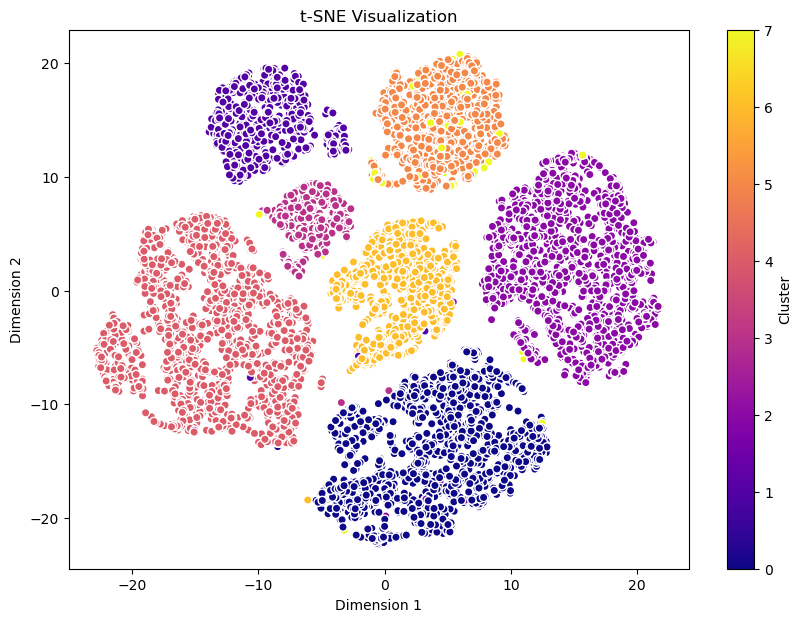

In [133]:
plt.figure(figsize=(10, 7))

plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=predictions_with_anomaly, cmap='plasma', marker='o', edgecolors='w')
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

2. DBSCAN

In DBSCAN it is harder to minimize the percentage of anomalies without affecting the number of desired clusters. Also, the number of outliers are much higher that the previous method.

number of DBSCAN Outliers =  779


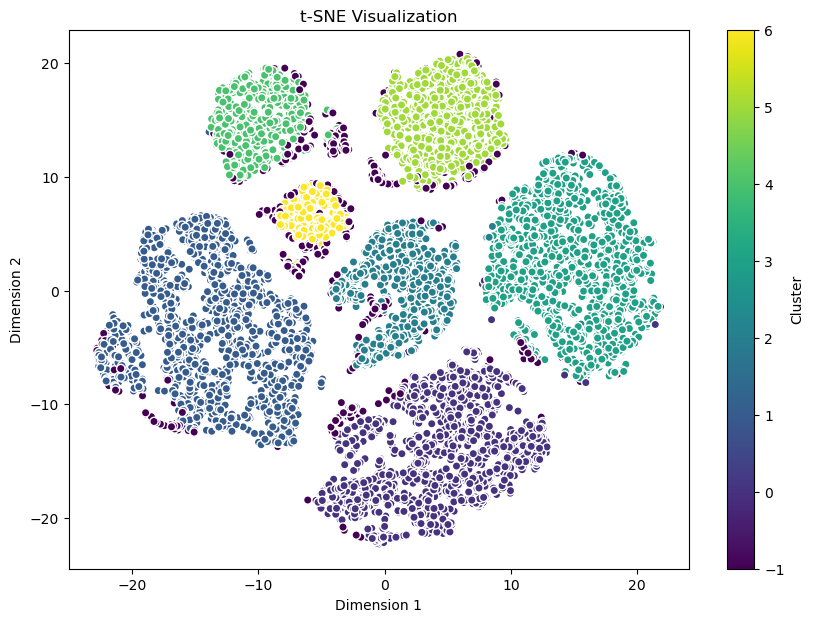

In [145]:
DBSCANClusters=DBSCANPlt(df_normalized,eps=2.8335,min_samples=150)
print("number of DBSCAN Outliers = ",len(DBSCANClusters.labels_[DBSCANClusters.labels_==-1]))
tsnePlt(df_tsne,DBSCANClusters.labels_)

3. Isolation Forest

Isolation Forest confirms with expectation maximization method when the contamination factor is 0.01. The t-sne plot below shows the anomlies with dark blue color.

number of outliers =  87


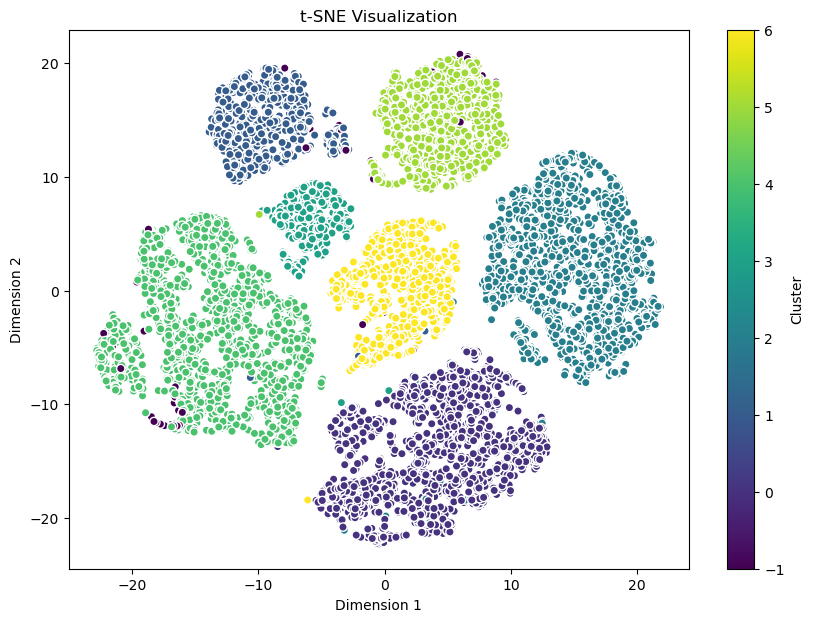

In [149]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=100,contamination=0.01)
clf.fit(df_normalized)
predictions_with_anomaly=GaussianMixtureModel.predict(df_normalized)
predictions_with_anomaly[clf.predict(df_normalized)==-1]=-1
print("number of outliers = ",len(predictions_with_anomaly[clf.predict(df_normalized)==-1]))
tsnePlt(df_tsne,predictions_with_anomaly)

## 9. <a name="9">Conclusion</a>
(<a href="#0">Go to top</a>)

In this notebook, an in-depth analysis of credit card data was conducted through clustering techniques. The initial focus involved meticulous preprocessing of the data to ensure its suitability for subsequent analysis. Following this, diverse clustering methodologies, such as K-means, Kernel K-means, Gaussian Mixture Model, and DBSCAN, were employed to partition the data into distinct clusters. Visualizations of these clusters were generated using t-SNE, revealing the identification of 7 meaningful clusters within the dataset.

The distinctive properties of each cluster were identified as follows:

No purchases were made in installment.
No transactions involved the 'go' purchase category.
Users did not engage in cash in advance transactions.
No 'go' purchases or cash in advance transactions were observed.
No purchases were made in installment, and no cash in advance transactions occurred.
The client did not engage in any purchases.
No zero values were present in the client data.
Additionally, the efficiency of Principal Component Analysis (PCA) and Kernel PCA for clustering was explored. The investigation revealed that Kernel PCA outperformed other methods, resulting in clusters with minimal misclassifications.

In the final stage, hierarchical clustering was explored, and various methods were applied to determine the overall prevalence of outliers within the dataset. This comprehensive analysis provides valuable insights into the underlying patterns and structures present in the credit card data, enhancing our understanding of user behavior and transaction trends.